## 1. Preliminary Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

!pip3 install pandas_profiling --upgrade

Initial exploratory data analysis of the original Public Use Microdata File (PUMF) dataset was conducted by reviewing the descriptive statistics provided in Statistics Canada's Data Dictionary document that accompanied the PUMF. The Data Dictionary listed all variables in the PUMF dataset, along with the answer categories (i.e. classes), codes utilized for each category, response frequencies, and percentages. 

In [ ]:
#Read file
df = pd.read_csv('HS.csv', index_col=None)

In [ ]:
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="1_Raw Dataset Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. Data Transformation

After examination of the Data Dictionary and the questionnaire used to gather responses, decisions were made on the appropriate process to clean and transform the data to remove irrelavant variables, delete invalid responses, and address missing values. The remainder of this section contains the code for this process.

In [ ]:
#Drop rows containing observations that are not valid for the project
df.drop(df[df['EMP_30'] != 1].index, inplace = True)
df.drop(df[df['GEN_10'] == 9].index, inplace = True)
df.drop(df[df['GEN_15'] == 9].index, inplace = True)

In [ ]:
#Create new derived variable, which will be the target variable for this project
df['Worse_MH'] = np.where((df['GEN_10'] >= 4) & (df['GEN_15'] >= 4), 0, 1)

In [ ]:
#Drop columns pertaining to variables that are not needed for the project
df = df.drop(columns=['PUMFID','VERDATE','EMP_05','BMF_P','EMP_30','ENV_25A','ENV_25B','ENV_25C','GEN_10','GEN_15'])

#Drop columns pertaining to derived variables that are not needed for the project
df = df.drop(columns=['PPEDVEY1','PPEDVEY2','PPEDVFV1','PPEDVFV2','PPEDVGL1','PPEDVGL2','PPEDVGN1','PPEDVGN2','PPEDVHS1','PPEDVHS2','PPEDVMA1','PPEDVMA2',\
                      'PPEDVOT1','PPEDVOT2','PPEDVRE1','PPEDVRE2','PPEDVRS1','PPEDVRS2','GENDVHDI','GENDVMHI'])

In [ ]:
#Reassignment of "Valid Skip" class, for variables pertaining to questions that were not asked of respondents based on their previous responses

#If ENV_30 = “Valid Skip” = 6, then reassign to “No” = 2
df['ENV_30'].mask(df['ENV_30'] == 6, 2, inplace=True)

#If PPE_10 = “No” = 2, then PPE_15A, PPE_15B, PPE_15C, PPE_15D, PPE_15E, PPE_15F, PPE_15G, PPE_15H, PPE_15I, and PPE_15J = “No” = 2 (instead of "Valid Skip")
skip_set_1 = ['PPE_15A','PPE_15B','PPE_15C','PPE_15D','PPE_15E','PPE_15F','PPE_15G','PPE_15H','PPE_15I','PPE_15J']
df[skip_set_1] = np.where(df[['PPE_10']] == 2, 2, df[skip_set_1])

#If PPE_20 = “No” = 2, then PPE_30A, PPE_30B, PPE_30C, PPE_30D, PPE_30E, PPE_30F, PPE_30G, PPE_30H,...
#PPE_35A, PPE_35B, PPE_35C, PPE_35D, PPE_35E, PPE_35F, PPE_35G, PPE_35H = "Not needed for job" = 1 (instead of "Valid Skip")
skip_set_2 = ['PPE_30A','PPE_30B','PPE_30C','PPE_30D','PPE_30E','PPE_30F','PPE_30G','PPE_30H','PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H']
df[skip_set_2] = np.where(df[['PPE_20']] == 2, 1, df[skip_set_2])

#If PPE_20 = “No” = 2, then PPE_25, PPE_40A, PPE_40B, PPE_40C, PPE_40D, PPE_40E, PPE_40F, PPE_40G, PPE_40H, PPE_40I,...
#PPE_45A, PPE_45B, PPE_45C, PPE_45D, PPE_45E, PPE_45F, PPE_45G, PPE_45H, PPE_45I = "No" = 2 (instead of "Valid Skip")
skip_set_3 = ['PPE_25','PPE_40A','PPE_40B','PPE_40C','PPE_40D','PPE_40E','PPE_40F','PPE_40G','PPE_40H','PPE_40I','PPE_45A',\
              'PPE_45B','PPE_45C','PPE_45D','PPE_45E','PPE_45F','PPE_45G','PPE_45H','PPE_45I']
df[skip_set_3] = np.where(df[['PPE_20']] == 2, 2, df[skip_set_3])

In [ ]:
#Reassignment of "Not stated" class (i.e. missing value category), for variables pertaining to questions that respondents did not answer

#If response to PPE access question = “Not stated” = 9, then update to "Not needed for job" = 1
missing_set_1 = ['PPE_30A','PPE_30B','PPE_30C','PPE_30D','PPE_30E','PPE_30F','PPE_30G','PPE_30H','PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H']
for col in missing_set_1:
  df[col].mask(df[col] == 9, 1, inplace=True)

#If response to PPE restriction question = “Not stated” = 9, then update to "No" = 2
missing_set_2 = ['PPE_40A','PPE_40B','PPE_40C','PPE_40D','PPE_40E','PPE_40F','PPE_40G','PPE_40H','PPE_40I',\
                 'PPE_45A','PPE_45B','PPE_45C','PPE_45D','PPE_45E','PPE_45F','PPE_45G','PPE_45H','PPE_45I']
for col in missing_set_2:
  df[col].mask(df[col] == 9, 2, inplace=True)

#If response to PPE or IPC protocol/practice question = “Not stated” = 9, then remove from dataset
df.drop(df[(df['PPE_05'] == 9)|(df['PPE_10'] == 9)|(df['PPE_15A'] == 9)|(df['PPE_15B'] == 9)|(df['PPE_15C'] == 9)|(df['PPE_15D'] == 9)|(df['PPE_15E'] == 9)|\
           (df['PPE_15F'] == 9)|(df['PPE_15G'] == 9)|(df['PPE_15H'] == 9)|(df['PPE_15I'] == 9)|(df['PPE_15J'] == 9)].index, inplace = True)
df.drop(df[(df['PPE_20'] == 9)|(df['PPE_25'] == 9)].index, inplace = True)
df.drop(df[(df['PPE_50A'] >= 96)|(df['PPE_50B'] >= 96)|(df['PPE_50C'] >= 96)|(df['PPE_50D'] >= 96)|(df['PPE_50E'] >= 96)|(df['PPE_50F'] >= 96)].index, inplace = True)

#Handling of 15/16 remaining variables with classes of "Not stated" = 9: Reassign to most frequent value
missing_set_3 = ['EMP_10','EMP_35','EMP_45','EMPDVGOC','ENV_30','ENVDVCON','ENVDVTYP','ENVDVGRW','GEN_05','GEN_20','AGEDVG4','GDRDVGRP','ISDVFLAG','PGDVFLA','IMMDVGST']
for col in missing_set_3:
  frequent = df[col].mode()
  df[col].mask(df[col] == 9, frequent[0], inplace=True)

In [ ]:
#Change non-ordinal variables to categorical or else they will be considered numeric
df = df.astype('category')

In [ ]:
#View basic summary of variables
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17319 entries, 0 to 18138
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEODVGPR  17319 non-null  category
 1   EMP_10    17319 non-null  category
 2   EMP_35    17319 non-null  category
 3   EMP_45    17319 non-null  category
 4   EMPDVGOC  17319 non-null  category
 5   EMPDVGYW  17319 non-null  category
 6   ENV_30    17319 non-null  category
 7   ENVDVCON  17319 non-null  category
 8   ENVDVTYP  17319 non-null  category
 9   ENVDVGRW  17319 non-null  category
 10  PPE_05    17319 non-null  category
 11  PPE_10    17319 non-null  category
 12  PPE_15A   17319 non-null  category
 13  PPE_15B   17319 non-null  category
 14  PPE_15C   17319 non-null  category
 15  PPE_15D   17319 non-null  category
 16  PPE_15E   17319 non-null  category
 17  PPE_15F   17319 non-null  category
 18  PPE_15G   17319 non-null  category
 19  PPE_15H   17319 non-null  category
 20  PPE_15

,GEODVGPR,EMP_10,EMP_35,EMP_45,EMPDVGOC,EMPDVGYW,ENV_30,ENVDVCON,ENVDVTYP,ENVDVGRW,...,PPE_50E,PPE_50F,GEN_05,GEN_20,AGEDVG4,GDRDVGRP,ISDVFLAG,PGDVFLA,IMMDVGST,Worse_MH
count,17319,17319,17319,17319,17319,17319,17319,17319,17319,17319,...,17319,17319,17319,17319,17319,17319,17319,17319,17319,17319
unique,7,2,2,3,9,4,2,3,7,8,...,6,6,5,5,4,2,2,2,2,2
top,30,2,1,1,5,1,2,2,1,30,...,4,2,2,4,1,2,2,2,1,1
freq,7898,14136,12883,12636,7491,5661,12222,9812,7259,7879,...,4061,5335,6917,7304,5047,15316,17065,15603,15476,11929


The initial working dataset has 72 categorical variables with 17,319 observations.


# 3. EDA

## 3.1 Univariate Analysis

In [ ]:
profile = ProfileReport(df)
profile.to_file(output_file="2. Transformed Dataset Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The Dataset Profile confirms the initial working dataset has no missing or invalid values. 

Of the 72 categorical variables, 5 are nominal, 39 are nominal and dichotomous (i.e. contain only 2 classes), and 28 are ordinal.

The distribution in the bar chart for each variable was examined. When a distribution is too skewed, such as when there is only one dominant bar and the other categories are present in very low numbers, this is often not helpful in machine learning. Several considerations for feature selection were identified.
*   ISDVFLAG is a variable with only 2 classes, and 98.5% of responses fall into 1 class. Hence, this variable could potentially be removed as it will not contribution information that will be useful for prediction.

## 3.2 Bivariate Analysis: Correlation Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


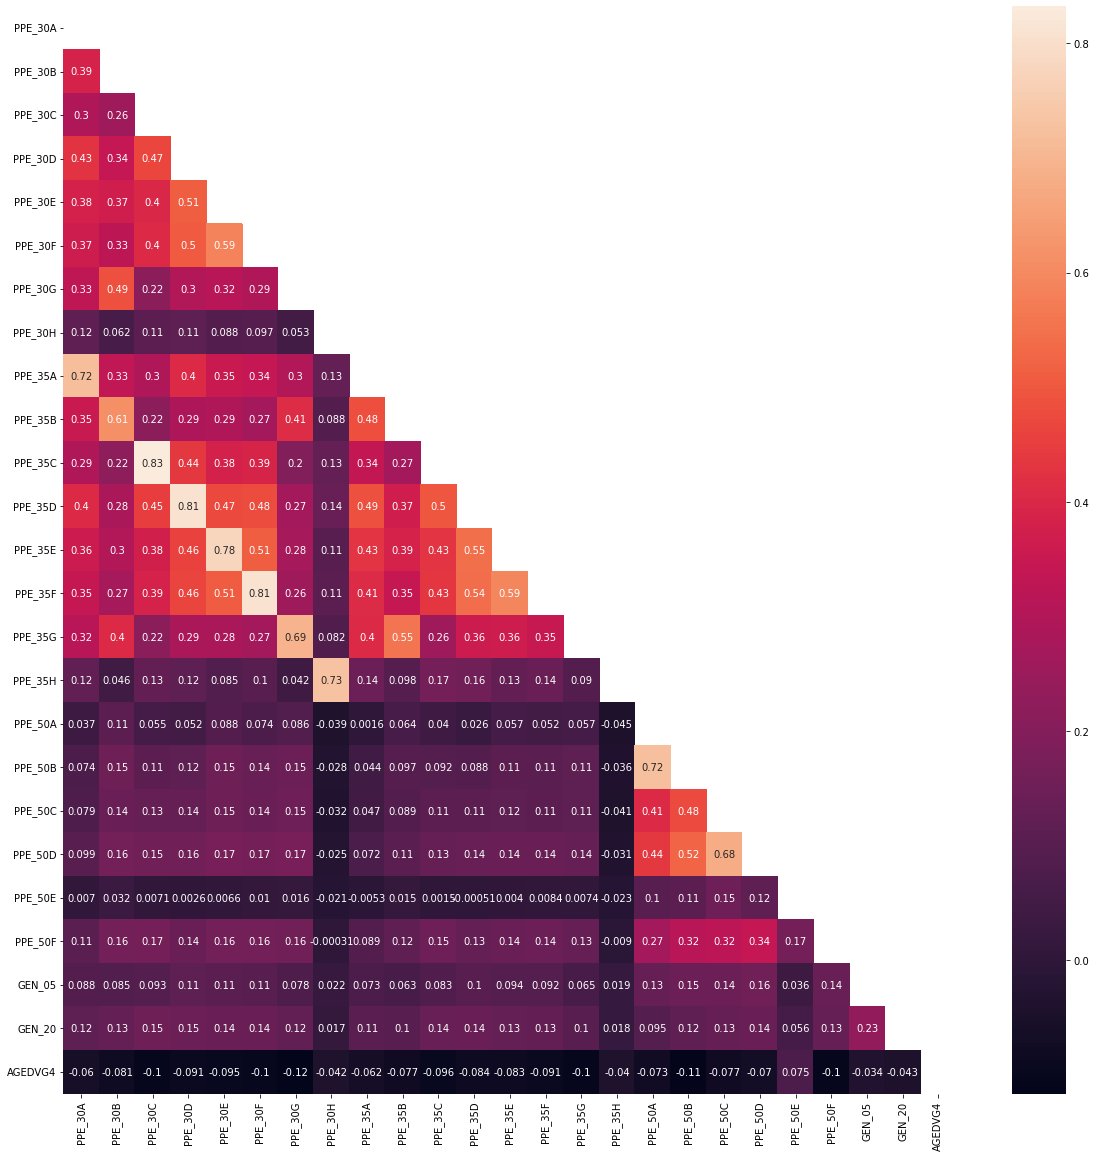

In [ ]:
#Kendall rank correlation for all 28 ordinal variable pairs

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Columns names of ordinal variables
ord_var = ['PPE_30A','PPE_30B','PPE_30C','PPE_30D','PPE_30E','PPE_30F','PPE_30G','PPE_30H','PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H',\
           'PPE_50A','PPE_50B','PPE_50C','PPE_50D','PPE_50E','PPE_50F','GEN_05','GEN_20','AGEDVG4']

#Changing ordinal variables to integer datatype so that kendal rank correlation can be performed
df[ord_var] = df[ord_var].astype(int)

#Kendal rank correlation and generation of heatmap
plt.figure(figsize=(20,20))
corr_mat = df[ord_var].corr(method="kendall")
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, annot=True, mask=mask)

The top 8 correlation coefficients occur between PPE_35* and PPE_30* variables:
*   PPE_35C and PPE_30C have the highest correlation coefficient of 0.83.
*   PPE_35D and PPE_30D, and also PPE_35F and PPE_30F, have the second highest correlation coefficients of 0.81.
*   PPE_35E and PPE_30E have the third highest correlation coefficient of 0.78.
*   PPE_35H and PPE_30H have the fourth highest correlation coefficient of 0.73.
*   PPE_35A and PPE_30A have the fifth highest correlation coefficient of 0.72.
*   PPE_35G and PPE_30G have the fifth highest correlation coefficient of 0.69.
*   PPE_35B and PPE_30B have the fifth highest correlation coefficient of 0.61.

The above results indicate that using both PPE_35* variables and PPE_30* variables may not be required in the classification model. One set may be sufficient.

All other correlation coefficients are below 0.6.

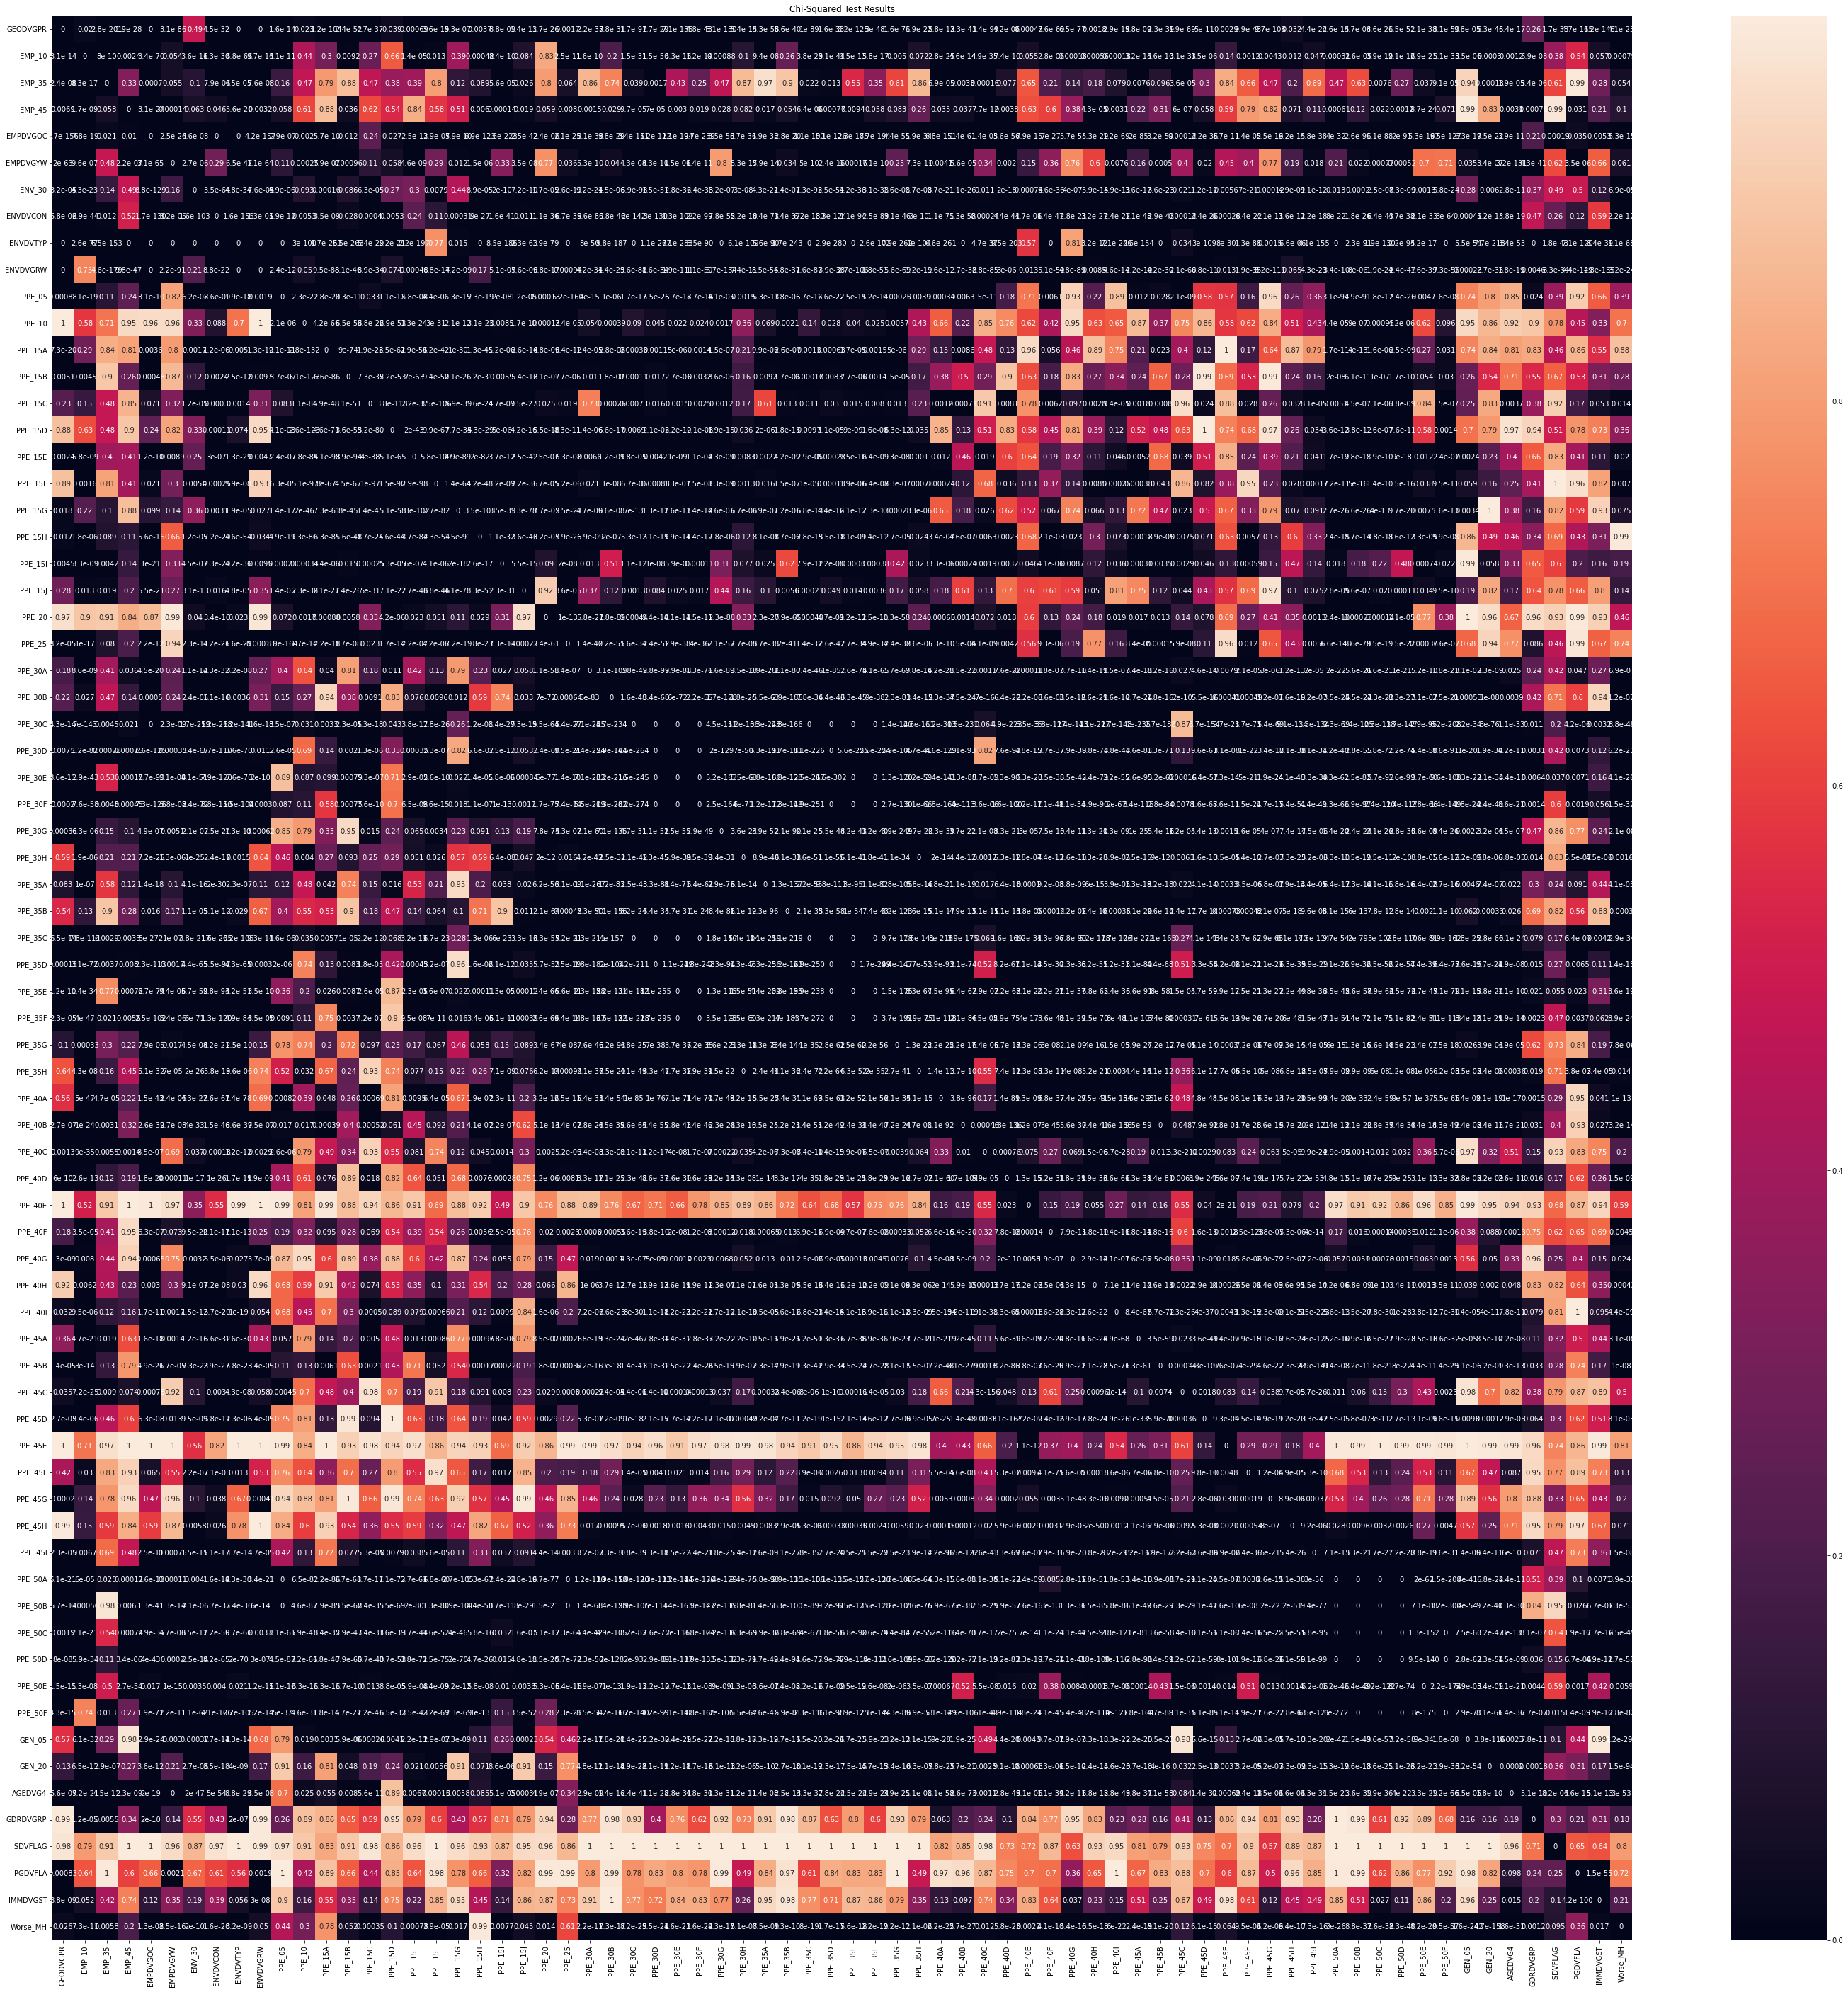

In [ ]:
#Chi-squared tests for all variable pairs

from sklearn.feature_selection import chi2

# Initializing the values in resultant matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding chi-square test p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
          chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
          resultant.loc[i,j] = p_val

fig = plt.figure(figsize=(50,50))
sns.heatmap(resultant, annot=True)
plt.title('Chi-Squared Test Results')
plt.show()

The heatmap provided some useful information to consider as part of feature selection:
*   The ISDVFLAG variable is not correlated with other variables, including the target variable Worse_MH. This confirms the previous conclusion that it could be removed from the dataset as part of feature selection.
*   Although the dataset has a high number of variables, the majority are highly correlated with each other, meaning there are many that will likely contribute the same amount of information to the model. In order to reduce the dimensionality of the dataset, Principal Component Analysis (PCA) will be used to create the final working dataset. 




In [ ]:
#Finding all variables with statistically significant correlation against target variable Worse_MH, defined as p-vaues less than or equal to 0.05
pd.set_option('max_rows', 999)
target_correlation = resultant.loc[resultant.index!='Worse_MH',resultant.columns=='Worse_MH']

sig_correlation = target_correlation[target_correlation<=0.05]
sig_correlation = sig_correlation.dropna()
print('Number of variables that have statistically significant correlation with target variable:', len(sig_correlation.index))

#Print identified variables in ascending order
print(sig_correlation.sort_values(by='Worse_MH'))

Number of variables that have statistically significant correlation with target variable: 46
               Worse_MH
GEN_05    1.219242e-294
GEN_20     1.544691e-94
PPE_50F    2.761759e-82
ENVDVTYP   1.137545e-68
PPE_50D    1.700344e-58
PPE_50B    1.275481e-53
AGEDVG4    2.988829e-53
PPE_50C    2.504848e-49
PPE_30C    8.819084e-48
PPE_35C    2.893396e-34
PPE_50A    3.867262e-33
PPE_30F    1.463031e-32
PPE_30E    4.070747e-26
ENVDVGRW   3.201195e-24
PPE_35F    8.907436e-24
GEODVGPR   4.121359e-23
PPE_30D    6.159162e-21
PPE_35E    3.580642e-19
PPE_35D    1.391241e-15
EMPDVGOC   5.315393e-15
PPE_40B    3.247730e-14
PPE_40A    1.042805e-13
ENVDVCON   2.222621e-12
PPE_40D    1.548020e-09
PPE_40I    4.388968e-09
PPE_45B    1.046617e-08
PPE_45I    1.528748e-08
PPE_30G    2.070036e-08
PPE_45A    3.139986e-08
PPE_30B    1.217336e-07
PPE_30A    6.931805e-07
PPE_35G    7.802540e-06
PPE_35A    4.088425e-05
ENV_30     6.890853e-05
PPE_45D    8.107202e-05
PPE_35B    2.956797e-04
PPE_40H    4.217043

Previously, it was found that variable pairs of PPE_35* and PPE_30* (e.g. PPE_35A & PPE_30A, PPE_35B & PPE_30B, and so on) were correlated with each other. The chi-square test above also shows that these variables have statistically significant correlation with the target variable. Thus, only one variable from each variable pair is required for predictive modeling. Based on the chi-square p-values above, it is seen that all the PPE_30* variables have higher statistically significant correlation with the target variable than their PPE_35* variable pair. Thus, the PPE_35* variables will be removed from the working dataset.

In [ ]:
#Finding all variables without statistically significant correlation against target variable Worse_MH, defined as p-vaues greater than 0.05
no_correlation = target_correlation[target_correlation>0.05]
no_correlation = no_correlation.dropna()
print('Number of variables that DO NOT have statistically significant correlation with target variable:', len(no_correlation.index))
drop_var2 = no_correlation.index
print(drop_var2)

Number of variables that DO NOT have statistically significant correlation with target variable: 25
Index(['EMP_35', 'EMP_45', 'EMPDVGYW', 'PPE_05', 'PPE_10', 'PPE_15A',
       'PPE_15B', 'PPE_15D', 'PPE_15G', 'PPE_15H', 'PPE_15I', 'PPE_15J',
       'PPE_20', 'PPE_25', 'PPE_40C', 'PPE_40E', 'PPE_45C', 'PPE_45E',
       'PPE_45F', 'PPE_45G', 'PPE_45H', 'GDRDVGRP', 'ISDVFLAG', 'PGDVFLA',
       'IMMDVGST'],
      dtype='object')


25/71 variables were found to not have statistically significant correlation with the target variable. They will be removed from the working dataset.

# 4. Development of Final Working Dataset A - Original Features

## 4.1 Initial Feature Selection

In [ ]:
#Drop 8 columns pertaining to PPE_35* variables that are highly correlated with PPE_30* variables. The PPE_30* variables have higher statistically significant correlation with the target variable.
drop_var1 = ['PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H']

for i in list(df.columns):
  for j in list(drop_var1):
    if i == j:
      df = df.drop(columns=[i])
      break

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17319 entries, 0 to 18138
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEODVGPR  17319 non-null  category
 1   EMP_10    17319 non-null  category
 2   EMP_35    17319 non-null  category
 3   EMP_45    17319 non-null  category
 4   EMPDVGOC  17319 non-null  category
 5   EMPDVGYW  17319 non-null  category
 6   ENV_30    17319 non-null  category
 7   ENVDVCON  17319 non-null  category
 8   ENVDVTYP  17319 non-null  category
 9   ENVDVGRW  17319 non-null  category
 10  PPE_05    17319 non-null  category
 11  PPE_10    17319 non-null  category
 12  PPE_15A   17319 non-null  category
 13  PPE_15B   17319 non-null  category
 14  PPE_15C   17319 non-null  category
 15  PPE_15D   17319 non-null  category
 16  PPE_15E   17319 non-null  category
 17  PPE_15F   17319 non-null  category
 18  PPE_15G   17319 non-null  category
 19  PPE_15H   17319 non-null  category
 20  PPE_15

In [ ]:
#Drop 25 columns pertaining to variables that did not have statistically significant correlation with the target variable, based on previous chi-square tests
for i in list(df.columns):
  for j in list(drop_var2):
    if i == j:
      df = df.drop(columns=[i])
      break

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17319 entries, 0 to 18138
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEODVGPR  17319 non-null  category
 1   EMP_10    17319 non-null  category
 2   EMPDVGOC  17319 non-null  category
 3   ENV_30    17319 non-null  category
 4   ENVDVCON  17319 non-null  category
 5   ENVDVTYP  17319 non-null  category
 6   ENVDVGRW  17319 non-null  category
 7   PPE_15C   17319 non-null  category
 8   PPE_15E   17319 non-null  category
 9   PPE_15F   17319 non-null  category
 10  PPE_30A   17319 non-null  int64   
 11  PPE_30B   17319 non-null  int64   
 12  PPE_30C   17319 non-null  int64   
 13  PPE_30D   17319 non-null  int64   
 14  PPE_30E   17319 non-null  int64   
 15  PPE_30F   17319 non-null  int64   
 16  PPE_30G   17319 non-null  int64   
 17  PPE_30H   17319 non-null  int64   
 18  PPE_40A   17319 non-null  category
 19  PPE_40B   17319 non-null  category
 20  PPE_40

## 4.2 One-Hot Key Encoding

In [ ]:
#One-hot key encoding of remaining 4 nominal categorical variables.
nom_cols = ['GEODVGPR','EMPDVGOC','ENVDVTYP','ENVDVGRW']
df = pd.get_dummies(df, columns=nom_cols, prefix = nom_cols)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17319 entries, 0 to 18138
Data columns (total 66 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   EMP_10       17319 non-null  category
 1   ENV_30       17319 non-null  category
 2   ENVDVCON     17319 non-null  category
 3   PPE_15C      17319 non-null  category
 4   PPE_15E      17319 non-null  category
 5   PPE_15F      17319 non-null  category
 6   PPE_30A      17319 non-null  int64   
 7   PPE_30B      17319 non-null  int64   
 8   PPE_30C      17319 non-null  int64   
 9   PPE_30D      17319 non-null  int64   
 10  PPE_30E      17319 non-null  int64   
 11  PPE_30F      17319 non-null  int64   
 12  PPE_30G      17319 non-null  int64   
 13  PPE_30H      17319 non-null  int64   
 14  PPE_40A      17319 non-null  category
 15  PPE_40B      17319 non-null  category
 16  PPE_40D      17319 non-null  category
 17  PPE_40F      17319 non-null  category
 18  PPE_40G      17319 non-nul

## 4.3 Save Working Dataset A

In [ ]:
#Save dataframe to new csv file
df.to_csv('3a. Working Dataset.csv', index=False)

# 5. Development of Final Working Dataset B - Principal Component Analysis (PCA)
[To be run after the above codes for obtaining "Final Working Dataset A"]

In [ ]:
#Normalization of data into new dataframe, as preparation for PCA
from sklearn.preprocessing import MinMaxScaler

X = df.loc[:,df.columns!='Worse_MH']
Y = df['Worse_MH']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

In [ ]:
#PCA with explained variance of 95%
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca_data = pca.fit_transform(scaled_data)
print('Number of principal components:', pca.n_components_)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Number of principal components: 37
Explained variation per principal component: [0.17665289 0.09731139 0.06106102 0.05051008 0.04518547 0.04169441
 0.0356716  0.03333033 0.03029843 0.02824956 0.02770574 0.0255021
 0.02426985 0.02114814 0.02036672 0.01955936 0.01800148 0.01632304
 0.01601041 0.01514432 0.01469325 0.01328007 0.01300701 0.01214615
 0.01135214 0.01062416 0.00859538 0.00847737 0.00791979 0.00780386
 0.00705182 0.00667071 0.00648513 0.00604474 0.00586839 0.00504661
 0.00494467]


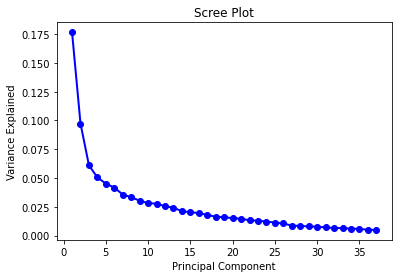

In [ ]:
#Scree plot of variance explained by principal components
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Based on the graph above, it appears that the "elbow" occurs after the top 5 principal components, and thereafter the line starts leveling out. It was decided that the top 25 principal components would be sufficient for a working dataset.

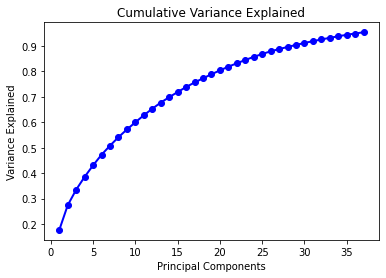

Cumulative Variance Explained by Top 25 Principal Components:  0.868474978429644


In [ ]:
#Cumulative variance explained by principal components
out_sum = np.cumsum(pca.explained_variance_ratio_)  

plt.plot(PC_values, out_sum, 'o-', linewidth=2, color='blue')
plt.title('Cumulative Variance Explained')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

print ("Cumulative Variance Explained by Top 25 Principal Components: ", out_sum[24])

In [ ]:
#Save dataframe to new csv file
columns = ['pca_%i' % i for i in range(25)]
df_pca = pd.DataFrame(pca_data[:,:25], columns=columns)
df_pca['Worse_MH'] = df['Worse_MH'].values
df_pca.to_csv('3b. Working Dataset - PCA.csv', index=False)

# Random Forest Classification Models

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import time

In [ ]:
#Read file
df = pd.read_csv('3a. Working Dataset.csv', index_col=None)

# 1. All Features in Working Dataset - Evaluation using Train-Test Split

In [ ]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [ ]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

#Random forest classification model

t1 = time.perf_counter() #time counter start

model = RandomForestClassifier(random_state=888)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

t2 = time.perf_counter() #time counter ends

#Save results into dictionary
rf_all_base = {'Accuracy':metrics.accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred),'Recall':metrics.recall_score(y_test, y_pred),\
          'F1-Score':metrics.f1_score(y_test, y_pred),'AUC':metrics.roc_auc_score(y_test, y_pred),'Brier Score':metrics.brier_score_loss(y_test, y_pred),'Execution Time (sec)':int(t2-t1)}

#Evaluation of random forest classification model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))
print('Execution time in seconds:', int(t2-t1))

Accuracy: 0.7517321016166282
Precision: 0.8331877729257642
Recall: 0.7996647108130763
F1-score: 0.8160821214713431
Area Under Curve (AUC): 0.7226523925122894
Brier Score: 0.24826789838337182
Execution time in seconds: 5


# 2. All Features in Working Dataset - Hyperparameter Tuning

### 2.1 Random Search with Cross Validation
In this section, a grid of hyperparameter ranges will be defined, and randomly sampled from the grid, where k-fold cross validation will be performed with each combination of values.

In [ ]:
from pprint import pprint

#Look at parameters currently used by the model
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 888,
 'verbose': 0,
 'warm_start': False}


The following set of hyperparameters will be adjusted to narrow down the best combination of parameters:
*   n_estimators = number of trees in the forest
*   max_features = max number of features considered for splitting a node
*   max_depth = max number of levels in each decision tree
*   min_samples_split = min number of data points placed in a node before the node is split
*   min_samples_leaf = min number of data points allowed in a leaf node
*   bootstrap = method for sampling data points (with or without replacement)

In [ ]:
#Creation of a parameter grid to sample from during fitting. On each iteration, the algorithm will choose a different, random combination of parameter values.

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = [2, 4, 6, 8, 10]

# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': [2, 4, 6, 8, 10],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [ ]:
#Using the random grid to search for best parameters

#Create the base model to tune
model = RandomForestClassifier(random_state=888)

#Random search of parameters across 50 different combinations, using 3 fold cross validation
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, scoring = 'recall', verbose=2, random_state=42, n_jobs = -1)

#Fit the random search model
model_random.fit(X_train, y_train)

#View the best parameters from fitting the random search (based on model with the best recall)
model_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 555}

In [ ]:
#Evaluation of best model from random search
best = model_random.best_estimator_
y_pred=best.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.7560623556581986
Precision: 0.8255175327418673
Recall: 0.8189438390611903
F1-score: 0.8222175468125394
Area Under Curve (AUC): 0.7179134779721535
Brier Score: 0.24393764434180137


Compared to the default random forest parameters used in the prior "All Features in Working Dataset - Evaluation using Train-Test Split" section, the best model from the grid search only resulted in a 1.9% increase in Recall (the metric chosen for scoring).
*   Accuracy, F1-score, and Brier Score improved very slightly.
*   Accuracy increased by 0.4%, the F1-score increased by 0.6%, and the Brier Score decreased by 0.4%.
*   Precision and AUC decreased very slightly by 0.8% and 0.5%, respectively.

The best model found in the random search has the same values for 1 of the 6 parameters as the default model (i.e. min_samples_leaf = 1).

### 2.2 Grid Search with Cross Validation
The random search above narrowed down the range for each hyperparameter. In this section, every combination of settings is defined.

In [ ]:
from sklearn.model_selection import GridSearchCV

#Create the parameter grid based on the results of previous random search. This will try out 1 * 3 * 3 * 2 * 3 * 3 = 162 combinations of settings.
param_grid = {
    'bootstrap': [False],
    'max_depth': [25, 30, 35],
    'max_features': [7, 8, 9],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [500, 550, 600]
}

#Create the base model to tune
model = RandomForestClassifier(random_state=888)

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, scoring = 'recall', n_jobs = -1, verbose = 2)

#Fit the grid search model
grid_search.fit(X_train, y_train)

#View the best parameters from fitting the grid search (based on model with the best recall)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 550}

In [ ]:
#Evaluate performance of best model from grid search
best = grid_search.best_estimator_
y_pred=best.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.7592378752886836
Precision: 0.8268744734625105
Recall: 0.8227158424140821
F1-score: 0.8247899159663865
Area Under Curve (AUC): 0.7207271234333863
Brier Score: 0.2407621247113164


Compared to the default random forest parameters used in the prior "All Features in Working Dataset - Evaluation using Train-Test Split" section, the best model from the random search only resulted in a 2.3% increase in Recall (the metric chosen for scoring).
*   Accuracy, F1-score, and Brier Score improved slightly.
*   Accuracy increased by 0.9%, the F1-score increased by 0.9%, and the Brier Score decreased by 0.8%.
*   Precision and AUC decreased very slightly by 0.6% and 0.2%, respectively.

The best model found in the grid search has the same value for 1 of the 6 parameters as the default model (i.e. min_samples_leaf = 1).

# 3. All Features in Working Dataset, Using Parameters from Grid Search - Evaluation using Repeated 10-fold Cross Validation

In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#Random forest classification model
model = RandomForestClassifier(bootstrap='False', max_depth=30, max_features=7, min_samples_leaf=1, min_samples_split=5, n_estimators=550)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
rf_all_tuned = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of random forest classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.7569332428758021
Precision: 0.8283452469587776
Recall: 0.8163572789444765
F1-score: 0.8222505685914855
Area Under Curve (AUC): 0.7208873593238152
Brier Score: 0.24306675712419765
Execution time in seconds: 21.255816308700027


# 4A. Selected Features - Filter Method

## 4A.1 Top Features Ranked by Importance

In [ ]:
#Identify top features based on model above
feature_names = df.drop(['Worse_MH'],axis=1).columns

feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)

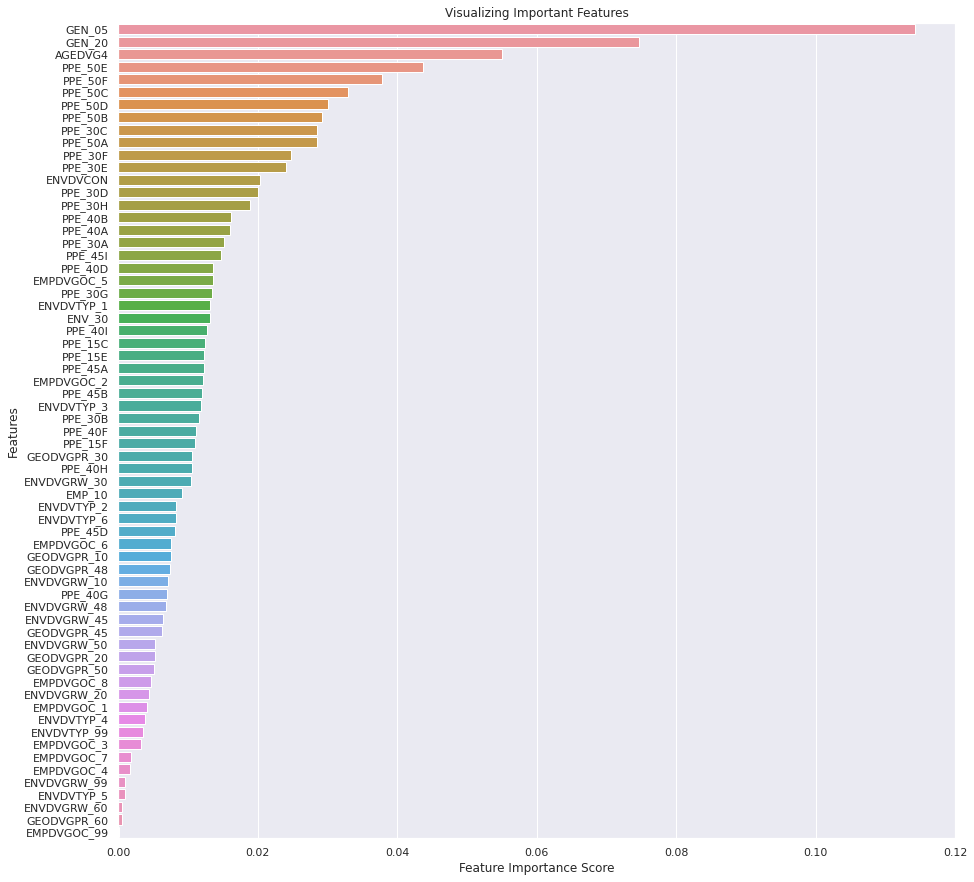

In [ ]:
#Plot features in terms of importance
import seaborn as sns

%matplotlib inline
# Creating a bar plot
sns.set(rc = {'figure.figsize':(15,15)})
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

After the top 15 features, the importance of the remaining features tapers off at a steady rate.

## 4A.2 Top 1 to 20 Features - Filter Method
Based on the bar graph above, it was decided to build random forest models using only the top 1 to 20 features to compare performance.

In [ ]:
#Build classification model using 1 to 20 of the top features and compare performance on Recall

recall_test = []

for n in range(1, 21):
  #Obtain names of top n variables
  top = feature_imp[:n].index

  #Split dataframe, using 80% for training and 20% for testing
  #Only select top n variables for X
  X = df.loc[:,top]
  y = df['Worse_MH']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 888, stratify=y)

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE(random_state = 888)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  #Random forest classification model, using the parameters identified during hyperparameter tuning, except for max_features
  model = RandomForestClassifier(bootstrap='False', max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=550, random_state=888)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  #Save results into list
  recall_test.append(metrics.recall_score(y_test, y_pred))

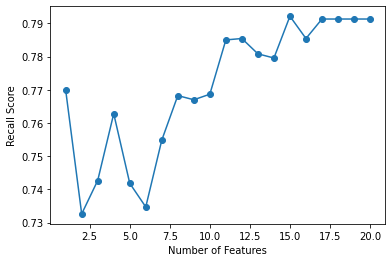

In [ ]:
#Plot recall scores against number of features used
plt.plot(range(1,21), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Features')
plt.show()

Based on the plot above, it appears that model performance is more unstable when less than 8 features are used, and then it generally increases thereafter, reaching a plateau when 15 features are used. That said, Recall only increases by 2% from using 8 features to 15 features.
*   During previous hyperparameter tuning, only the use of up 10 features was selected to test, where the best model found used 7 features. Based on the plot above, results would likely have differed if a higher number of features had been selected to test.



## 4A.3 Top 11 Features, Filter Method - Evaluation using Repeated 10-fold Cross Validation
Based on the results above, it was decided to build a random forest model using the top 11 features.

In [ ]:
#Obtain names of top 11 variables
top_eleven = feature_imp[:11].index
top_eleven

#Only select top 11 variables for X
X = df.loc[:,top_eleven]
y = df['Worse_MH']

In [ ]:
#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#Random forest classification model, using the parameters identified during hyperparameter tuning, except for max_features
model = RandomForestClassifier(bootstrap='False', max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=550)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
rf_eleven_features_filter = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of random forest classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.7388996290529666
Precision: 0.8335068075953681
Recall: 0.7760083522261666
F1-score: 0.8036774579611449
Area Under Curve (AUC): 0.7163900759275545
Brier Score: 0.26110037094703337
Execution time in seconds: 10.251541886133335


# 4B. 11 Selected Features using Recursive Feature Elimination (RFE) - Wrapper Method
The model obtained in section 4A.3, which used the top 11 features, did not perform as well as the base model or the tuned model in sections 1 (all features) and 3 (max features to consider at each split = 7). Thus, it was decided to try building a model using RFE with only 11 features to see if results would be similar.



In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

In [ ]:
#Random forest classification model with RFE for 11 features

#Set cross-validation to 5-folds, repeated 2 times.
#Originally, the number of repeats was set to 3, but execution runtime exceeded 5 hours before the decision was made to interrupt execution.
#Thus, the number of folds and repeats was changed to reduce runtime.
folds = 5
repeats = 2
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)


#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  #Random forest classification model, using the parameters identified during hyperparameter tuning, except for max_features.
  model = RandomForestClassifier(bootstrap='False', max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=550)

  #7 chosen as the number of features
  rfe = RFE(estimator=model, n_features_to_select=11) 
  rfe_fitted = rfe.fit(X_train, y_train)

  y_pred=rfe_fitted.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
rf_eleven_features_rfe = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of random forest classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.7272351179976512
Precision: 0.8375595507613041
Recall: 0.749265175438134
F1-score: 0.7909151936501397
Area Under Curve (AUC): 0.713871919815542
Brier Score: 0.27276488200234883
Execution time in seconds: 645.9360779326


# 5. Comparison of Models

In [ ]:
#Combine performance metrics for all models into one dataframe
comparison = pd.DataFrame([rf_all_base, rf_all_tuned, rf_eleven_features_filter, rf_eleven_features_rfe], index=['RF All Features - Base','RF All Features - Tuned','RF 11 Features - Filter','RF 11 Features - RFE'])
comparison

,Accuracy,Precision,Recall,F1-Score,AUC,Brier Score,Execution Time (sec)
RF All Features - Base,0.751732,0.833188,0.799665,0.816082,0.722652,0.248268,3.000000
RF All Features - Tuned,0.756933,0.828345,0.816357,0.822251,0.720887,0.243067,21.255816
RF 11 Features - Filter,0.738900,0.833507,0.776008,0.803677,0.716390,0.261100,10.251542
RF 11 Features - RFE,0.727235,0.837560,0.749265,0.790915,0.713872,0.272765,645.936078


'RF All Features - Tuned', the random forest model using all features and the parameters identified during hyperparameter tuning, had the best Accuracy, Recall, F1-Score, and Brier Score, with a reasonable execution time of 10 seconds. It had the second best Precision and AUC, which was extremely close to the best scores achieves by the 'RF All Features - Base' model.

# 6. Stability of Best Model by Varying k-folds for Cross Validation

The stability of the best model identified above was tested by performing repeated k-folds cross-validation, with values of k from 3 to 15.

In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

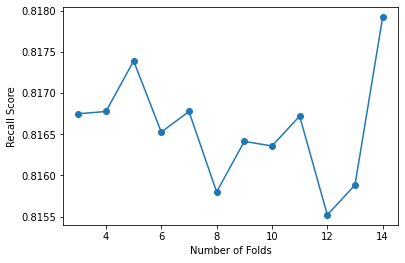

In [ ]:
recall_test = []

for k in range(3, 16):
  #Set cross-validation to k-folds, repeated 3 times
  repeats = 3
  rkf = RepeatedStratifiedKFold(n_splits=k, n_repeats=repeats)

  #Best random forest classification model identified in section 5, 'RF All Features - Tuned'
  model = RandomForestClassifier(bootstrap='False', max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=550)

  #Performance metrics
  recall = 0

  for train_index, test_index in rkf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    recall = recall + metrics.recall_score(y_test, y_pred)

  #Calculate average recall, append to list
  recall_test.append(recall/(k*repeats))

#Plot recall scores against number of folds used
plt.plot(range(3, 16), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Folds')
plt.show()

print("Range of Recall Scores:", (max(recall_test)-min(recall_test))*100)

The model appears to be quite stable, with Recall ranging by less than 1%.

# Support Vector Machine (SVM) Classification Models

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import time

In [ ]:
#Read file
df = pd.read_csv('3a. Working Dataset.csv', index_col=None)

# 1. All Features in Working Dataset - Evaluation using Train-Test Split

In [ ]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [ ]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

#SVM classification model

t1 = time.perf_counter() #time counter start

model = svm.SVC(random_state=888)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

t2 = time.perf_counter() #time counter ends

#Save results into dictionary
svm_all_base = {'Accuracy':metrics.accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred),'Recall':metrics.recall_score(y_test, y_pred),\
          'F1-Score':metrics.f1_score(y_test, y_pred),'AUC':metrics.roc_auc_score(y_test, y_pred),'Brier Score':metrics.brier_score_loss(y_test, y_pred),'Execution Time (sec)':int(t2-t1)}

#Evaluation of random forest classification model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))
print('Execution time in seconds:', int(t2-t1))

Accuracy: 0.7673210161662818
Precision: 0.8378956372968349
Recall: 0.8210393964794636
F1-score: 0.8293818797629128
Area Under Curve (AUC): 0.734731201022663
Brier Score: 0.23267898383371824
Execution time in seconds: 38


# 2. All Features in Working Dataset - Hyperparameter Tuning
In this section, a grid of hyperparameter ranges will be defined, and where k-fold cross validation will be performed with all combinations.

In [ ]:
from pprint import pprint

#Look at parameters currently used by the model
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 888,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


The following set of hyperparameters will be adjusted to narrow down the best combination of parameters:
*   C = Regularization parameter of the error term. The C value adds a penalty each time an item is misclassified. Thus, a low C value has more misclassified items, while a large C value has a plane with a very little margin that leads to overfitting.
*   gamma = Coefficient of the RBF kernel. A non-linear kernel like the RBF kernel uses a gamma value. It determines the influence of training points on the decision boundary. If the gamma value is low, all training points have an influence on the decision line, and the radius of similarity is high. If the gamma value is high, the radius of similarity is low and influence is limited only to the nearby points. A larger gamma value, therefore, results in overfitting.

In [ ]:
from sklearn.model_selection import GridSearchCV

#Create the parameter grid. This will try out 5 * 5 = 25 combinations of settings.
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

#Create the base model to tune
model = svm.SVC(random_state=888)

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, scoring = 'recall', n_jobs = -1, verbose = 2)

#Fit the grid search model
grid_search.fit(X_train, y_train)

#View the best parameters from fitting the grid search (based on model with the best recall)
grid_search.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


{'C': 1, 'gamma': 1}

In [ ]:
#Evaluate performance of best model from grid search
best = grid_search.best_estimator_
y_pred=best.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.6885103926096998
Precision: 0.6894752102058568
Recall: 0.9966471081307627
F1-score: 0.8150814053127677
Area Under Curve (AUC): 0.5015703073121346
Brier Score: 0.31148960739030024


Compared to the default SVC parameters used in the prior "All Features in Working Dataset - Evaluation using Train-Test Split" section, the best model from the grid search resulted in an 18% increase in Recall (the metric chosen for scoring).
*   However, performance reduced for all other metrics. AUC was 23% lower, followed by Precision (15% lower), Accuracy (8% lower) and Brier Score (8% higher), and F1-score (1% lower).

The best model found in the grid search has the same values for C as the default model (i.e. C = 1). Thus, the only parameter "tuned" was gamma.

# 3. All Features in Working Dataset, Using Parameters from Grid Search - Evaluation using Repeated 10-fold Cross Validation

In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#SVM classification model
model = svm.SVC(C=1, gamma=1)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
svm_all_tuned = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of SVM classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.6867217550362031
Precision: 0.6890722024539117
Recall: 0.9934334512846189
F1-score: 0.8137226958621465
Area Under Curve (AUC): 0.5006746724573992
Brier Score: 0.31327824496379697
Execution time in seconds: 128.38463339133335


# 4. Selected Features - Filter Method

## 4.1 Top 1 to 40 Features - Filter Method
SVM models were built using the top 1 to 40 features to compare performance.

In [ ]:
#Build classification model using 1 to 40 of the top features (based on correlation with target variable, identified during EDA), and compare performance on Recall

top_forty = ['GEN_05', 'GEN_20', 'AGEDVG4', 'PPE_50E', 'PPE_50F', 'PPE_50C',
       'PPE_50D', 'PPE_50B', 'PPE_30C', 'PPE_50A', 'PPE_30F', 'PPE_30E',
       'ENVDVCON', 'PPE_30D', 'PPE_30H', 'PPE_40B', 'PPE_40A', 'PPE_30A',
       'PPE_45I', 'PPE_40D', 'EMPDVGOC_5', 'PPE_30G', 'ENVDVTYP_1', 'ENV_30',
       'PPE_40I', 'PPE_15C', 'PPE_15E', 'PPE_45A', 'EMPDVGOC_2', 'PPE_45B',
       'ENVDVTYP_3', 'PPE_30B', 'PPE_40F', 'PPE_15F', 'GEODVGPR_30', 'PPE_40H',
       'ENVDVGRW_30', 'EMP_10', 'ENVDVTYP_2', 'ENVDVTYP_6']

recall_test = []

for n in range(1, 41):
  #Obtain names of top n variables
  top = top_forty[:n]

  #Split dataframe, using 80% for training and 20% for testing
  #Only select top n variables for X
  X = df[top]
  y = df['Worse_MH']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE(random_state = 888)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  #SVM classification model, using the parameters identified during hyperparameter tuning
  model = svm.SVC(C=1, gamma=1, random_state=888)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  #Save results into list
  recall_test.append(metrics.recall_score(y_test, y_pred))

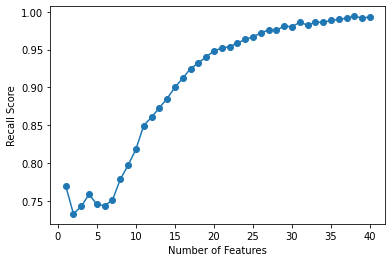

In [ ]:
#Plot recall scores against number of features used
plt.plot(range(1,41), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Features')
plt.show()

Based on the plot above, it appears that model performance is more unstable when less than 6 features are used, and then performance increases thereafter, tapering off when about 25 features are used.



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[   9 1069]
 [  16 2370]]


## 4.2 Top 25 Features, Filter Method - Evaluation using Repeated 10-fold Cross Validation
Based on the results above, it was decided to build a SVM model using the top 25 features.

In [ ]:
#Only select top 25 variables for X
top = top_forty[:25]

X = df[top]
y = df['Worse_MH']

In [ ]:
#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#SVM classification model, using the parameters identified during hyperparameter tuning
model = svm.SVC(C=1, gamma=1)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Mifilnority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
svm_25_features_tuned = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of SVM classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.6854320014195696
Precision: 0.6953731767319291
Recall: 0.9668593454359977
F1-score: 0.8089412712194702
Area Under Curve (AUC): 0.5147221897248017
Brier Score: 0.3145679985804305
Execution time in seconds: 105.47117264260002


# 5. Comparison of Models

In [ ]:
#Combine performance metrics for all models into one dataframe
comparison = pd.DataFrame([svm_all_base, svm_all_tuned, svm_25_features_tuned], index=['SVM All Features - Base','SVM All Features - Tuned','SVM 25 Features - Tuned'])
comparison

,Accuracy,Precision,Recall,F1-Score,AUC,Brier Score,Execution Time (sec)
SVM All Features - Base,0.767321,0.837896,0.821039,0.829382,0.734731,0.232679,25.000000
SVM All Features - Tuned,0.686722,0.689072,0.993433,0.813723,0.500675,0.313278,128.384633
SVM 25 Features - Tuned,0.685432,0.695373,0.966859,0.808941,0.514722,0.314568,105.471173


'SVM All Features - Tuned', the SVM model using all features and the parameters identified during hyperparameter tuning, had the best Recall with a reasonable execution time of 128 seconds.

# 6. Stability of Best Model by Varying k-folds for Cross Validation

The stability of the best model identified above was tested by performing repeated k-folds cross-validation, with values of k from 5 to 12, and 2 repeats.
*   Originally, values of k from 3 to 15 were used, and the number of repeats was set to 3, but execution runtime exceeded 5 hours before the decision was made to interrupt execution. Thus, values of k and the number of repeats were then changed to reduce runtime.



In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

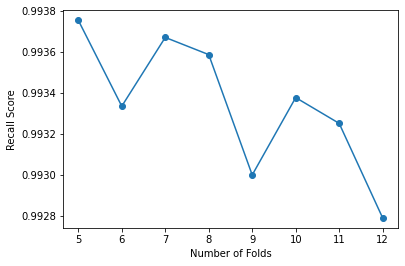

Range of Recall Scores (percent): 0.09640938650455899


In [ ]:
recall_test = []

for k in range(5, 13):
  #Set cross-validation to k-folds, repeated 2 times
  repeats = 2
  rkf = RepeatedStratifiedKFold(n_splits=k, n_repeats=repeats)

  #Best SVM classification model identified in section 5, 'SVM All Features - Tuned'
  model = svm.SVC(C=1, gamma=1)

  #Performance metrics
  recall = 0

  for train_index, test_index in rkf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    recall = recall + metrics.recall_score(y_test, y_pred)

  #Calculate average recall, append to list
  recall_test.append(recall/(k*repeats))

#Plot recall scores against number of folds used
plt.plot(range(5, 13), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Folds')
plt.show()

print("Range of Recall Scores (percent):", (max(recall_test)-min(recall_test))*100)

The model appears to be quite stable, with Recall ranging by less than 0.1%.

# eXtreme Gradient Boosting (XGBoost) Classification Models

In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import time

In [2]:
#Read file
df = pd.read_csv('3a. Working Dataset.csv', index_col=None)

# 1. All Features in Working Dataset - Evaluation using Train-Test Split

In [ ]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [ ]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

#XGBoost classification model

t1 = time.perf_counter() #time counter start

model = XGBClassifier(random_state=888)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

t2 = time.perf_counter() #time counter ends

#Save results into dictionary
xgb_all_base = {'Accuracy':metrics.accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred),'Recall':metrics.recall_score(y_test, y_pred),\
          'F1-Score':metrics.f1_score(y_test, y_pred),'AUC':metrics.roc_auc_score(y_test, y_pred),'Brier Score':metrics.brier_score_loss(y_test, y_pred),'Execution Time (sec)':int(t2-t1)}

#Evaluation of XGBoost classification model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))
print('Execution time in seconds:', int(t2-t1))

Accuracy: 0.7580831408775982
Precision: 0.856353591160221
Recall: 0.779547359597653
F1-score: 0.8161474330846862
Area Under Curve (AUC): 0.7450612493721104
Brier Score: 0.24191685912240185
Execution time in seconds: 3


# 2. All Features in Working Dataset - Hyperparameter Tuning

### 2.1 Random Search with Cross Validation
In this section, a grid of hyperparameter ranges will be defined, and randomly sampled from the grid, where k-fold cross validation will be performed with each combination of values.

In [ ]:
from pprint import pprint

#Look at parameters currently used by the model
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 888,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


The following set of hyperparameters will be adjusted to narrow down the best combination of parameters:
*   learning_rate: step size shrinkage used to prevent overfitting (range is 0 to 1). Makes the model more robust by shrinking the weights on each step.
Typical values used are 0.01 to 0.2.
*   min_child_weight = minimum sum of weights of all observations required in a child, used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. High values can lead to under-fitting.
*   max_depth = how deeply each tree is allowed to grow during any boosting round. Used to control over-fitting as higher depths will allow models to learn relations very specific to a particular sample.
*   gamma = the minimum loss reduction required to make a split
*   subsample = percentage of samples used per tree (a low value prevents overfitting, but values that are too small can lead to underfitting)
*   colsample_bytree = percentage of features used per tree (a high value can lead to overfitting)
*   n_estimators = number of trees to build
*   reg_alpha = regularization term on weight. Can be used in case of very high dimensionality so that the algorithm runs faster when implemented

In [ ]:
#Creation of a parameter grid to sample from during fitting. On each iteration, the algorithm will choose a different, random combination of parameter values.

from sklearn.model_selection import RandomizedSearchCV

# Step size shrinkage used to prevent overfitting
learning_rate = [0.01, 0.2]

# Minimum sum of weights of all observations required in a child
min_child_weight = range(1,6,2)

# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50]

# Minimum loss reduction required to make a split
gamma = [i/10.0 for i in range(0,5)]

# Percentage of samples used per tree
subsample = [i/10.0 for i in range(6,10)]

# Percentage of features used per tree
colsample_bytree = [i/10.0 for i in range(6,10)]

# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

# Regularization
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]

# Create the random grid
random_grid = {'learning_rate': learning_rate,
               'min_child_weight': min_child_weight,
               'max_depth': max_depth,
               'gamma': gamma,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'n_estimators': n_estimators,
               'reg_alpha': reg_alpha}

pprint(random_grid)

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [0.01, 0.2],
 'max_depth': [10, 20, 30, 40, 50],
 'min_child_weight': range(1, 6, 2),
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000],
 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
 'subsample': [0.6, 0.7, 0.8, 0.9]}


In [ ]:
#Using the random grid to search for best parameters

#Create the base model to tune
model = XGBClassifier(random_state=888)

#Random search of parameters across 50 different combinations, using 3 fold cross validation
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, scoring = 'recall', verbose=2, random_state=42, n_jobs = -1)

#Fit the random search model
model_random.fit(X_train, y_train)

#View the best parameters from fitting the random search (based on model with the best recall)
model_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 40,
 'min_child_weight': 1,
 'n_estimators': 911,
 'reg_alpha': 0.1,
 'subsample': 0.7}

In [ ]:
#Evaluation of best model from random search
best = model_random.best_estimator_
y_pred=best.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.7655889145496536
Precision: 0.8249380677126342
Recall: 0.837384744341995
F1-score: 0.8311148086522463
Area Under Curve (AUC): 0.7220318897962293
Brier Score: 0.23441108545034642


Compared to the default XGBoost parameters used in the prior "All Features in Working Dataset - Evaluation using Train-Test Split" section, the best model from the grid search resulted in a 5.8% increase in Recall (the metric chosen for scoring).
*   Accuracy, F1-score, and Brier Score improved very slightly.
*   Accuracy increased by 0.8%, the F1-score increased by 1.5%, and the Brier Score decreased by 0.8%.
*   Precision and AUC decreased slightly by 3.1% and 2.3%, respectively.

The best model found in the random search has the same values for 1 of the 6 parameters as the default model (i.e. min_child_weight = 1).

### 2.2 Grid Search with Cross Validation
The random search above narrowed down the range for each hyperparameter. In this section, every combination of settings is defined.

In [ ]:
from sklearn.model_selection import GridSearchCV

#Create the parameter grid based on the results of previous random search. This will try out 3 * 1 * 1 * 3 * 1 * 1 * 2 * 3 = 54 combinations of settings.
param_grid = {'learning_rate': [0.01, 0.05, 0.1],
               'min_child_weight': [1],
               'max_depth': [40],
               'gamma': [0.05, 0.1, 0.15],
               'subsample': [0.7],
               'colsample_bytree': [0.8],
               'n_estimators': [800, 900],
               'reg_alpha': [0.05, 0.1, 0.5]}

#Create the base model to tune
model = XGBClassifier(random_state=888)

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, scoring = 'recall', n_jobs = -1, verbose = 2)

#Fit the grid search model
grid_search.fit(X_train, y_train)

#View the best parameters from fitting the grid search (based on model with the best recall)
grid_search.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'colsample_bytree': 0.8,
 'gamma': 0.15,
 'learning_rate': 0.01,
 'max_depth': 40,
 'min_child_weight': 1,
 'n_estimators': 800,
 'reg_alpha': 0.5,
 'subsample': 0.7}

In [ ]:
#Evaluate performance of best model from grid search
best = grid_search.best_estimator_
y_pred=best.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.7846420323325635
Precision: 0.8134556574923547
Recall: 0.8918692372170998
F1-score: 0.8508596561375449
Area Under Curve (AUC): 0.7195895351206092
Brier Score: 0.21535796766743648


Compared to the default XGBoost parameters used in the prior "All Features in Working Dataset - Evaluation using Train-Test Split" section, the best model from the random search resulted in a 11.2% increase in Recall (the metric chosen for scoring).
*   Accuracy, F1-score, and Brier Score also improved.
*   Accuracy increased by 2.7%, the F1-score increased by 3.5%, and the Brier Score decreased by 2.\%.
*   Precision and AUC decreased by 4.3% and 2.5%, respectively.

# 3. All Features in Working Dataset, Using Parameters from Grid Search - Evaluation using Repeated 10-fold Cross Validation

In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats, random_state=888)

#XGBoost classification model
model = XGBClassifier(colsample_bytree=0.8, gamma=0.15, learning_rate=0.01, max_depth=40, min_child_weight=1, n_estimators=800, reg_alpha=0.5, subsample=0.7, random_state=888)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE(random_state = 888)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
xgb_all_tuned = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of XGBoost classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.7620916458423114
Precision: 0.8182458055013232
Recall: 0.8415903686868401
F1-score: 0.8297102380678496
Area Under Curve (AUC): 0.7138687774170133
Brier Score: 0.2379083541576887
Execution time in seconds: 237.32520521553354


# 4A. Selected Features - Filter Method

## 4A.1 Top Features Ranked by Importance

In [ ]:
#Identify top features based on model above
feature_names = df.drop(['Worse_MH'],axis=1).columns

feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)

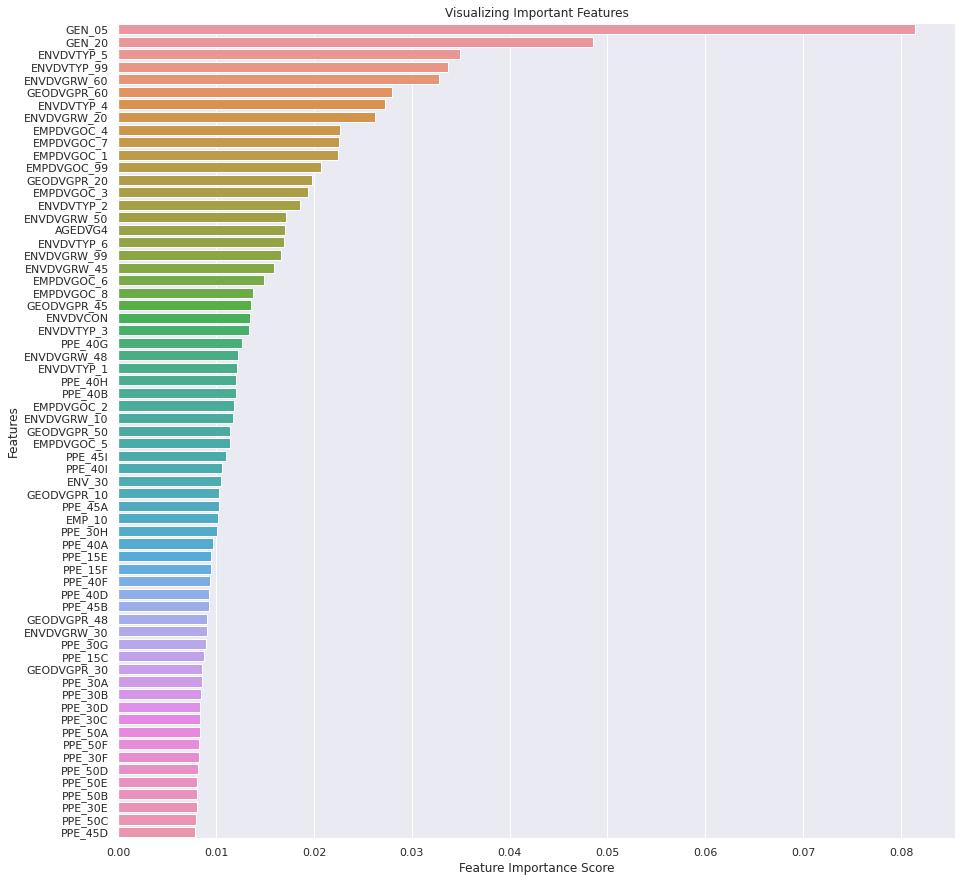

In [ ]:
#Plot features in terms of importance
import seaborn as sns

%matplotlib inline
# Creating a bar plot
sns.set(rc = {'figure.figsize':(15,15)})
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

After the top 21 features, the importance of the remaining features tapers off at a steady rate.

## 4A.2 Top 1 to 21 Features - Filter Method
Based on the bar graph above, it was decided to build XGBoost models using only the top 1 to 21 features to compare performance.

In [ ]:
#Build classification model using 1 to 21 of the top features and compare performance on Recall

recall_test = []

for n in range(1, 22):
  #Obtain names of top n variables
  top = feature_imp[:n].index

  #Split dataframe, using 80% for training and 20% for testing
  #Only select top n variables for X
  X = df.loc[:,top]
  y = df['Worse_MH']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE(random_state = 888)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  #XGBoost classification model, using the parameters identified during hyperparameter tuning
  model = XGBClassifier(colsample_bytree=0.8, gamma=0.15, learning_rate=0.01, max_depth=40, min_child_weight=1, n_estimators=800, reg_alpha=0.5, subsample=0.7, random_state=888)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  #Save results into list
  recall_test.append(metrics.recall_score(y_test, y_pred))

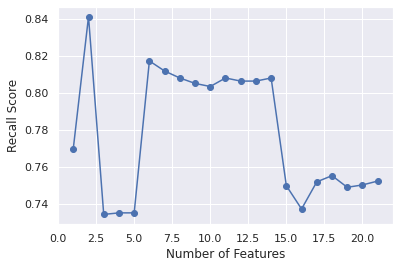

In [ ]:
#Plot recall scores against number of features used
plt.plot(range(1,22), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Features')
plt.show()

Based on the plot above, it appears that model performance is unstable when less than 6 features are used, and then Recall experiences a sharp decline after 14 features are used.



## 4A.3 Top 6 Features, Filter Method - Evaluation using Repeated 10-fold Cross Validation
Based on the results above, it was decided to build a XGBoost model using the top 6 features.

In [ ]:
#Obtain names of top 6 variables
top_six = feature_imp[:6].index
top_six

#Only select top 11 variables for X
X = df.loc[:,top_six]
y = df['Worse_MH']

In [ ]:
#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats, random_state=888)

#XGBoost classification model, using the parameters identified during hyperparameter tuning
model = XGBClassifier(colsample_bytree=0.8, gamma=0.15, learning_rate=0.01, max_depth=40, min_child_weight=1, n_estimators=800, reg_alpha=0.5, subsample=0.7, random_state=888)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE(random_state = 888)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
xgb_six_features_filter = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of XGBoost classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.7585104237406101
Precision: 0.8357421156625889
Recall: 0.808697219612542
F1-score: 0.8215101609705653
Area Under Curve (AUC): 0.7280653692373165
Brier Score: 0.2414895762593898
Execution time in seconds: 10.361842602833105


This model performed slightly better than the base model (section 1) but not as well as the tuned model using all features.

# 4B. 6 Selected Features using Recursive Feature Elimination (RFE) - Wrapper Method
Based on the results in previous sections, it was decided to try building a model using RFE with only 6 features.



In [8]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

In [ ]:
#XGBoost classification model with RFE for 6 features

#Set cross-validation to 5-folds, repeated 2 times.
#Originally, the number of repeats was set to 3, and folds was set to 10, but execution runtime exceeded 5 hours before the decision was made to interrupt execution.
#Thus, the number of folds and repeats was changed to reduce runtime.
folds = 5
repeats = 2
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  #XGBoost classification model, using the parameters identified during hyperparameter tuning
  model = XGBClassifier(colsample_bytree=0.8, gamma=0.15, learning_rate=0.01, max_depth=40, min_child_weight=1, n_estimators=800, reg_alpha=0.5, subsample=0.7)

  #6 chosen as the number of features
  rfe = RFE(estimator=model, n_features_to_select=6) 
  rfe_fitted = rfe.fit(X_train, y_train)

  y_pred=rfe_fitted.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
xgb_six_features_rfe = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of XGBoost classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Even after the reduction in repeats and folds during cross-validation, the code did not finish executing after 8 hours, at which the execution was interrupted. Results were obtained for 4 out of 10 intended runs.

# 5. Comparison of Models

In [6]:
#Combine performance metrics for all models into one dataframe
comparison = pd.DataFrame([xgb_all_base, xgb_all_tuned, xgb_six_features_filter], index=['XGBoost All Features - Base','XGBoost All Features - Tuned','XGBoost 6 Features - Filter'])
comparison

,Accuracy,Precision,Recall,F1-Score,AUC,Brier Score,Execution Time (sec)
XGBoost All Features - Base,0.758083,0.856354,0.779547,0.816147,0.745061,0.241917,3.000000
XGBoost All Features - Tuned,0.762092,0.818246,0.841590,0.829710,0.713869,0.237908,237.325205
XGBoost 6 Features - Filter,0.758510,0.835742,0.808697,0.821510,0.728065,0.241490,10.361843


'XGBoost All Features - Tuned', the XGBoost model using all features and the parameters identified during hyperparameter tuning, had the best Accuracy, Recall, F1-Score, and Brier Score. However, execution time was significantly greater at 237 seconds, but still considered reasonable.

# 6. Stability of Best Model by Varying k-folds for Cross Validation

The stability of the best model identified above was tested by performing repeated k-folds cross-validation, with values of k from 5 to 12, and 2 repeats.
*   Originally, values of k from 3 to 15 were used, and the number of repeats was set to 3, but execution runtime exceeded 5 hours before the decision was made to interrupt execution. Thus, values of k and the number of repeats were then changed to reduce runtime.

In [3]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

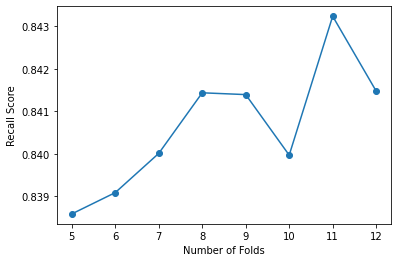

Range of Recall Scores: 0.4652632254015798


In [4]:
recall_test = []

for k in range(5, 13):
  #Set cross-validation to k-folds, repeated 2 times
  repeats = 2
  rkf = RepeatedStratifiedKFold(n_splits=k, n_repeats=repeats)

  #Best XGBoost classification model identified in section 5, 'XGBoost All Features - Tuned'
  model = XGBClassifier(colsample_bytree=0.8, gamma=0.15, learning_rate=0.01, max_depth=40, min_child_weight=1, n_estimators=800, reg_alpha=0.5, subsample=0.7)

  #Performance metrics
  recall = 0

  for train_index, test_index in rkf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    recall = recall + metrics.recall_score(y_test, y_pred)

  #Calculate average recall, append to list
  recall_test.append(recall/(k*repeats))

#Plot recall scores against number of folds used
plt.plot(range(5, 13), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Folds')
plt.show()

print("Range of Recall Scores:", (max(recall_test)-min(recall_test))*100)

The model appears to be quite stable, with Recall ranging by less than 0.5%.

# Random Forest Classification Models using Working Dataset with Principal Components

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import time

In [ ]:
#Read file
df = pd.read_csv('3b. Working Dataset - PCA.csv', index_col=None)

# 1. All Principal Components in Working Dataset - Evaluation using Train-Test Split

In [ ]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [ ]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

#Random forest classification model

t1 = time.perf_counter() #time counter start

model = RandomForestClassifier(random_state=888)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

t2 = time.perf_counter() #time counter ends

#Save results into dictionary
rf_all_base_pca = {'Accuracy':metrics.accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred),'Recall':metrics.recall_score(y_test, y_pred),\
          'F1-Score':metrics.f1_score(y_test, y_pred),'AUC':metrics.roc_auc_score(y_test, y_pred),'Brier Score':metrics.brier_score_loss(y_test, y_pred),'Execution Time (sec)':int(t2-t1)}

#Evaluation of random forest classification model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))
print('Execution time in seconds:', int(t2-t1))

Accuracy: 0.6581986143187067
Precision: 0.7531592249368155
Recall: 0.7493713327745181
F1-score: 0.7512605042016807
Area Under Curve (AUC): 0.602886037444773
Brier Score: 0.3418013856812933
Execution time in seconds: 12


# 2. All Principal Components in Working Dataset - Hyperparameter Tuning

### 2.1 Random Search with Cross Validation
In this section, a grid of hyperparameter ranges will be defined, and randomly sampled from the grid, where k-fold cross validation will be performed with each combination of values.

In [ ]:
from pprint import pprint

#Look at parameters currently used by the model
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 888,
 'verbose': 0,
 'warm_start': False}


The following set of hyperparameters will be adjusted to narrow down the best combination of parameters:
*   n_estimators = number of trees in the forest
*   max_features = max number of features considered for splitting a node
*   max_depth = max number of levels in each decision tree
*   min_samples_split = min number of data points placed in a node before the node is split
*   min_samples_leaf = min number of data points allowed in a leaf node
*   bootstrap = method for sampling data points (with or without replacement)

In [ ]:
#Creation of a parameter grid to sample from during fitting. On each iteration, the algorithm will choose a different, random combination of parameter values.

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = [2, 4, 6, 8, 10]

# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': [2, 4, 6, 8, 10],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [ ]:
#Using the random grid to search for best parameters

#Create the base model to tune
model = RandomForestClassifier(random_state=888)

#Random search of parameters across 50 different combinations, using 3 fold cross validation
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, scoring = 'recall', verbose=2, random_state=42, n_jobs = -1)

#Fit the random search model
model_random.fit(X_train, y_train)

#View the best parameters from fitting the random search (based on model with the best recall)
model_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [ ]:
#Evaluation of best model from random search
best = model_random.best_estimator_
y_pred=best.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.6697459584295612
Precision: 0.7368421052631579
Recall: 0.8097233864207879
F1-score: 0.7715654952076677
Area Under Curve (AUC): 0.5848245874590025
Brier Score: 0.3302540415704388


Compared to the default random forest parameters used in the prior "All Principal Components in Working Dataset - Evaluation using Train-Test Split" section, the best model from the grid search resulted in a 6.0% increase in Recall (the metric chosen for scoring).
*   Accuracy, F1-score, and Brier Score improved.
*   Accuracy increased by 1.2%, the F1-score increased by 2.0%, and the Brier Score decreased by 1.2%.
*   Precision and AUC actually decreased by 1.6% and 1.8%, respectively.

The best model found in the random search has the same values for 1 of the 6 parameters as the default model (i.e. min_samples_leaf = 1).

### 2.2 Grid Search with Cross Validation
The random search above narrowed down the range for each hyperparameter. In this section, every combination of settings is defined.

In [ ]:
from sklearn.model_selection import GridSearchCV

#Create the parameter grid based on the results of previous random search. This will try out 1 * 3 * 3 * 2 * 3 * 3 = 162 combinations of settings.
param_grid = {
    'bootstrap': [False],
    'max_depth': [25, 30, 35],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [500, 750, 1000]
}

#Create the base model to tune
model = RandomForestClassifier(random_state=888)

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, scoring = 'recall', n_jobs = -1, verbose = 2)

#Fit the grid search model
grid_search.fit(X_train, y_train)

#View the best parameters from fitting the grid search (based on model with the best recall)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [ ]:
#Evaluate performance of best model from grid search
best = grid_search.best_estimator_
y_pred=best.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.7592378752886836
Precision: 0.8268744734625105
Recall: 0.8227158424140821
F1-score: 0.8247899159663865
Area Under Curve (AUC): 0.7207271234333863
Brier Score: 0.2407621247113164


Compared to the default random forest parameters used in the prior "All Principal Components in Working Dataset - Evaluation using Train-Test Split" section, the best model from the grid search resulted in a 7.3% increase in Recall (the metric chosen for scoring).
*   All other metrics also saw improvements. Accuracy, Precision, F1-score, and AUC increased by 10.1%, 7.4%, 7.4%, and 11.8%, respectively, whereas the Brier Score decreased by 10.1%.

The best model found in the grid search has the same value for 1 of the 6 parameters as the default model (i.e. min_samples_leaf = 1).

# 3. All Principal Components in Working Dataset, Using Parameters from Grid Search - Evaluation using Repeated 10-fold Cross Validation

In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#Random forest classification model
model = RandomForestClassifier(bootstrap='False', max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1000)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
rf_all_tuned_pca = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of random forest classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.6681296860358742
Precision: 0.7511235594162222
Recall: 0.7750024612251554
F1-score: 0.7628322202971342
Area Under Curve (AUC): 0.6033020964134437
Brier Score: 0.3318703139641256
Execution time in seconds: 39.85768799453375


# 4. Top Principal Components

## 4.1 Top 1 to 20 Principal Components
It was decided to build random forest models using only the top 1 to 20 principal components to compare performance.

In [ ]:
#Build classification model using 1 to all of the top principal components and compare performance on Recall

recall_test = []
components = len(df.columns)

for n in range(1, components):

  #Split dataframe, using 80% for training and 20% for testing
  #Only select top n variables for X
  X = df.iloc[:,:n]
  y = df['Worse_MH']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE(random_state = 888)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  #Random forest classification model, using the parameters identified during hyperparameter tuning
  model = RandomForestClassifier(bootstrap='False', max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, random_state=888)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  #Save results into list
  recall_test.append(metrics.recall_score(y_test, y_pred))

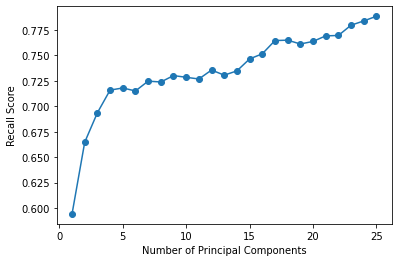

In [ ]:
#Plot recall scores against number of principal components used
plt.plot(range(1,components), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Principal Components')
plt.show()

Based on the plot above, it appears that model performance plateaus after the first 17 principal components.



## 4.2 Top 17 Principal Components - Evaluation using Repeated 10-fold Cross Validation
Based on the results above, it was decided to build a random forest model using the top 17 principal components.

In [ ]:
#Only select top 17 variables for X
X = df.iloc[:,:17]
y = df['Worse_MH']

In [ ]:
#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#Random forest classification model, using the parameters identified during hyperparameter tuning
model = RandomForestClassifier(bootstrap='False', max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1000)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
rf_17_tuned_pca = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of random forest classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.6535018716348043
Precision: 0.7500636494716361
Recall: 0.745271072306576
F1-score: 0.7476078225341165
Area Under Curve (AUC): 0.5978365256399916
Brier Score: 0.3464981283651959
Execution time in seconds: 38.63736094676654


# 5. Comparison of Models

In [ ]:
#Combine performance metrics for all models into one dataframe
comparison = pd.DataFrame([rf_all_base_pca, rf_all_tuned_pca, rf_17_tuned_pca], index=['RF All Components - Base (PCA)','RF All Components - Tuned (PCA)','RF 17 Components - Tuned (PCA)'])
comparison

,Accuracy,Precision,Recall,F1-Score,AUC,Brier Score,Execution Time (sec)
RF All Components - Base (PCA),0.658199,0.753159,0.749371,0.751261,0.602886,0.341801,12.000000
RF All Components - Tuned (PCA),0.668130,0.751124,0.775002,0.762832,0.603302,0.331870,39.857688
RF 17 Components - Tuned (PCA),0.653502,0.750064,0.745271,0.747608,0.597837,0.346498,38.637361


'RF All Features - Tuned', the random forest model using all features and the parameters identified during hyperparameter tuning, had the best Accuracy, Recall, F1-Score, and Brier Score, with a reasonable execution time of 10 seconds. It had the second best Precision and AUC, which was extremely close to the best scores achieves by the 'RF All Features - Base' model.

# 6. Stability of Best Model by Varying k-folds for Cross Validation

The stability of the best model identified above was tested by performing repeated k-folds cross-validation, with values of k from 3 to 15.

In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

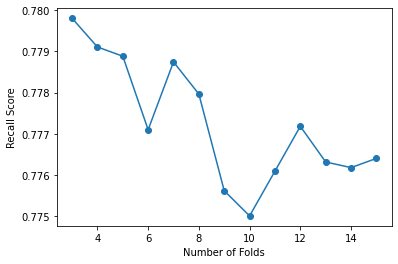

Range of Recall Scores: 0.4805939650863178


In [ ]:
recall_test = []

for k in range(3, 16):
  #Set cross-validation to k-folds, repeated 3 times
  repeats = 3
  rkf = RepeatedStratifiedKFold(n_splits=k, n_repeats=repeats)

  #Best random forest classification model identified in section 5, 'RF All Components - Tuned (PCA)'
  model = RandomForestClassifier(bootstrap='False', max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=1000)

  #Performance metrics
  recall = 0

  for train_index, test_index in rkf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    recall = recall + metrics.recall_score(y_test, y_pred)

  #Calculate average recall, append to list
  recall_test.append(recall/(k*repeats))

#Plot recall scores against number of folds used
plt.plot(range(3, 16), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Folds')
plt.show()

print("Range of Recall Scores (percent):", (max(recall_test)-min(recall_test))*100)

The model appears to be quite stable, with Recall ranging by less than 0.5%. It does appear that the performance decreases as the number of folks increase.

# Support Vector Machine (SVM) Classification Models using Working Dataset with Principal Components

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import time

In [ ]:
#Read file
df = pd.read_csv('3b. Working Dataset - PCA.csv', index_col=None)

# 1. All Principal Components in Working Dataset - Evaluation using Train-Test Split

In [ ]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [ ]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

#SVM classification model

t1 = time.perf_counter() #time counter start

model = svm.SVC(random_state=888)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

t2 = time.perf_counter() #time counter ends

#Save results into dictionary
svm_all_base_pca = {'Accuracy':metrics.accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred),'Recall':metrics.recall_score(y_test, y_pred),\
          'F1-Score':metrics.f1_score(y_test, y_pred),'AUC':metrics.roc_auc_score(y_test, y_pred),'Brier Score':metrics.brier_score_loss(y_test, y_pred),'Execution Time (sec)':int(t2-t1)}

#Evaluation of random forest classification model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))
print('Execution time in seconds:', int(t2-t1))

Accuracy: 0.6498267898383372
Precision: 0.7829232995658466
Recall: 0.6802179379715004
F1-score: 0.7279659116393811
Area Under Curve (AUC): 0.6313891174087557
Brier Score: 0.3501732101616628
Execution time in seconds: 41


# 2. All Principal Components in Working Dataset - Hyperparameter Tuning
In this section, a grid of hyperparameter ranges will be defined, and where k-fold cross validation will be performed with all combinations.

In [ ]:
from pprint import pprint

#Look at parameters currently used by the model
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 888,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


The following set of hyperparameters will be adjusted to narrow down the best combination of parameters:
*   C = Regularization parameter of the error term. The C value adds a penalty each time an item is misclassified. Thus, a low C value has more misclassified items, while a large C value has a plane with a very little margin that leads to overfitting.
*   gamma = Coefficient of the RBF kernel. A non-linear kernel like the RBF kernel uses a gamma value. It determines the influence of training points on the decision boundary. If the gamma value is low, all training points have an influence on the decision line, and the radius of similarity is high. If the gamma value is high, the radius of similarity is low and influence is limited only to the nearby points. A larger gamma value, therefore, results in overfitting.

In [ ]:
from sklearn.model_selection import GridSearchCV

#Create the parameter grid. This will try out 5 * 5 = 25 combinations of settings.
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

#Create the base model to tune
model = svm.SVC(random_state=888)

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, scoring = 'recall', n_jobs = -1, verbose = 2)

#Fit the grid search model
grid_search.fit(X_train, y_train)

#View the best parameters from fitting the grid search (based on model with the best recall)
grid_search.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


{'C': 1, 'gamma': 1}

In [ ]:
#Evaluate performance of best model from grid search
best = grid_search.best_estimator_
y_pred=best.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.6423210161662818
Precision: 0.7230649552703229
Recall: 0.7791282481139983
F1-score: 0.7500504337300787
Area Under Curve (AUC): 0.5593229366729546
Brier Score: 0.35767898383371827


Compared to the default SVC parameters used in the prior "All Principal Components in Working Dataset - Evaluation using Train-Test Split" section, the best model from the grid search resulted in a 9.9% increase in Recall (the metric chosen for scoring).
*   The F1-score also improved by 2.2%.
*   However, performance reduced for all other metrics. AUC was 7.2% lower, followed by Precision (6.0% lower), Accuracy (0.8% lower) and Brier Score (0.8% higher).

The best model found in the grid search has the same values for C as the default model (i.e. C = 1). Thus, the only parameter "tuned" was gamma.

# 3. All Principal Components in Working Dataset, Using Parameters from Grid Search - Evaluation using Repeated 10-fold Cross Validation

In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#SVM classification model
model = svm.SVC(C=1, gamma=1)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
svm_all_tuned_pca = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of SVM classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.6433589318362035
Precision: 0.7279956220424239
Recall: 0.769916843406073
F1-score: 0.748332709390702
Area Under Curve (AUC): 0.5665910747642611
Brier Score: 0.3566410681637967
Execution time in seconds: 81.49708263036663


# 4. Top Principal Components

## 4.1 Top 1 to All Principal Components
It was decided to build SVM models using the top 1 to all principal components to compare performance.

In [ ]:
#Build classification model using 1 to all of the principal components and compare performance on Recall

recall_test = []
components = len(df.columns)

for n in range(1, components):

  #Split dataframe, using 80% for training and 20% for testing
  #Only select top n variables for X
  X = df.iloc[:,:n]
  y = df['Worse_MH']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE(random_state = 888)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  #SVM classification model, using the parameters identified during hyperparameter tuning
  model = svm.SVC(C=1, gamma=1, random_state=888)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  #Save results into list
  recall_test.append(metrics.recall_score(y_test, y_pred))

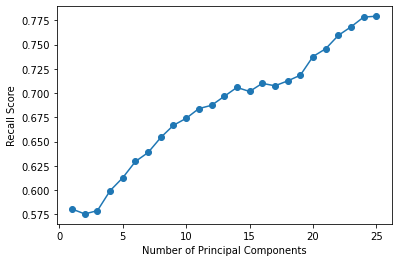

In [ ]:
#Plot recall scores against number of features used
plt.plot(range(1,components), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Principal Components')
plt.show()

Based on the plot above, it appears that model performance increases as more principal components are used, until 24 components are reached. Recall score for 24 versus 25 principal components are roughly equal.



## 4.2 Top 24 Principal Components, Filter Method - Evaluation using Repeated 10-fold Cross Validation
Based on the results above, it was decided to build a SVM model using the top 24 features.

In [ ]:
#Only select top 24 components for X
X = df.iloc[:,:24]
y = df['Worse_MH']

In [ ]:
#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#SVM classification model, using the parameters identified during hyperparameter tuning
model = svm.SVC(C=1, gamma=1)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Mifilnority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
svm_24_tuned_pca = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of SVM classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.6438594279294964
Precision: 0.7315411679231411
Recall: 0.762986970977233
F1-score: 0.7468870747297449
Area Under Curve (AUC): 0.5715986184508923
Brier Score: 0.3561405720705035
Execution time in seconds: 73.42844921190002


# 5. Comparison of Models

In [ ]:
#Combine performance metrics for all models into one dataframe
comparison = pd.DataFrame([svm_all_base_pca, svm_all_tuned_pca, svm_24_tuned_pca], index=['SVM All Components - Base (PCA)','SVM All Components - Tuned (PCA)','SVM 24 Components - Tuned (PAC)'])
comparison

,Accuracy,Precision,Recall,F1-Score,AUC,Brier Score,Execution Time (sec)
SVM All Components - Base (PCA),0.649827,0.782923,0.680218,0.727966,0.631389,0.350173,41.000000
SVM All Components - Tuned (PCA),0.643359,0.727996,0.769917,0.748333,0.566591,0.356641,81.497083
SVM 24 Components - Tuned (PAC),0.643859,0.731541,0.762987,0.746887,0.571599,0.356141,73.428449


'SVM All Components - Tuned (PCA)', the SVM model using all principal components and the parameters identified during hyperparameter tuning, had the best Recall with a reasonable execution time of 82 seconds. THe Recall was 9% higher than the "SVM All Components - Base (PCA)" model.
*   The model also had the best F1-score.
*   The model performed slightly worse for Accuracy, Precision, AUC, and Brier Score (0.6%, 5.5%, 6.5% amd 0.6% worse, respectively).



# 6. Stability of Best Model by Varying k-folds for Cross Validation

The stability of the best model identified above was tested by performing repeated k-folds cross-validation, with values of k from 5 to 12.
*   Originally, values of k from 3 to 15 were used, but execution runtime exceeded 10 hours before the decision was made to interrupt execution. Values of k were then changed to reduce runtime.



In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

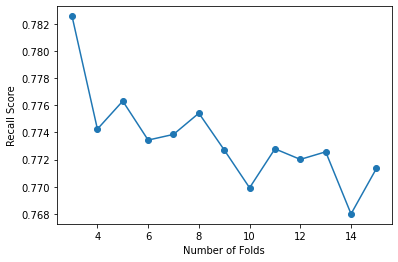

Range of Recall Scores (percent): 1.458573073056224


In [ ]:
recall_test = []

for k in range(5, 13):
  #Set cross-validation to k-folds, repeated 3 times
  repeats = 3
  rkf = RepeatedStratifiedKFold(n_splits=k, n_repeats=repeats, random_state=888)

  #Best SVM classification model identified in section 5, 'SVM All Features - Tuned (PCA)'
  model = svm.SVC(C=1, gamma=1, random_state=888)

  #Performance metrics
  recall = 0

  for train_index, test_index in rkf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
    smote = SMOTE(random_state = 888)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    recall = recall + metrics.recall_score(y_test, y_pred)

  #Calculate average recall, append to list
  recall_test.append(recall/(k*repeats))

#Plot recall scores against number of folds used
plt.plot(range(5, 13), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Folds')
plt.show()

print("Range of Recall Scores (percent):", (max(recall_test)-min(recall_test))*100)

The model appears to be quite stable, with Recall ranging by less than 1.5%.

# eXtreme Gradient Boosting (XGBoost) Classification Models using Working Dataset with Principal Components

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import time

In [ ]:
#Read file
df = pd.read_csv('3b. Working Dataset - PCA.csv', index_col=None)

# 1. All Principal Components in Working Dataset - Evaluation using Train-Test Split

In [ ]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [ ]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

#XGBoost classification model

t1 = time.perf_counter() #time counter start

model = XGBClassifier(random_state=888)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

t2 = time.perf_counter() #time counter ends

#Save results into dictionary
xgb_all_base_pca = {'Accuracy':metrics.accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred),'Recall':metrics.recall_score(y_test, y_pred),\
          'F1-Score':metrics.f1_score(y_test, y_pred),'AUC':metrics.roc_auc_score(y_test, y_pred),'Brier Score':metrics.brier_score_loss(y_test, y_pred),'Execution Time (sec)':int(t2-t1)}

#Evaluation of XGBoost classification model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))
print('Execution time in seconds:', int(t2-t1))

Accuracy: 0.6391454965357968
Precision: 0.7927835051546391
Recall: 0.644593461860855
F1-score: 0.7110494683310217
Area Under Curve (AUC): 0.6358403301883124
Brier Score: 0.3608545034642032
Execution time in seconds: 3


# 2. All Principal Components in Working Dataset - Hyperparameter Tuning

### 2.1 Random Search with Cross Validation
In this section, a grid of hyperparameter ranges will be defined, and randomly sampled from the grid, where k-fold cross validation will be performed with each combination of values.

In [ ]:
from pprint import pprint

#Look at parameters currently used by the model
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 888,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


The following set of hyperparameters will be adjusted to narrow down the best combination of parameters:
*   learning_rate: step size shrinkage used to prevent overfitting (range is 0 to 1). Makes the model more robust by shrinking the weights on each step.
Typical values used are 0.01 to 0.2.
*   min_child_weight = minimum sum of weights of all observations required in a child, used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. High values can lead to under-fitting.
*   max_depth = how deeply each tree is allowed to grow during any boosting round. Used to control over-fitting as higher depths will allow models to learn relations very specific to a particular sample.
*   gamma = the minimum loss reduction required to make a split
*   subsample = percentage of samples used per tree (a low value prevents overfitting, but values that are too small can lead to underfitting)
*   colsample_bytree = percentage of features used per tree (a high value can lead to overfitting)
*   n_estimators = number of trees to build
*   reg_alpha = regularization term on weight. Can be used in case of very high dimensionality so that the algorithm runs faster when implemented

In [ ]:
#Creation of a parameter grid to sample from during fitting. On each iteration, the algorithm will choose a different, random combination of parameter values.

from sklearn.model_selection import RandomizedSearchCV

# Step size shrinkage used to prevent overfitting
learning_rate = [0.01, 0.2]

# Minimum sum of weights of all observations required in a child
min_child_weight = range(1,6,2)

# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50]

# Minimum loss reduction required to make a split
gamma = [i/10.0 for i in range(0,5)]

# Percentage of samples used per tree
subsample = [i/10.0 for i in range(6,10)]

# Percentage of features used per tree
colsample_bytree = [i/10.0 for i in range(6,10)]

# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

# Regularization
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]

# Create the random grid
random_grid = {'learning_rate': learning_rate,
               'min_child_weight': min_child_weight,
               'max_depth': max_depth,
               'gamma': gamma,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'n_estimators': n_estimators,
               'reg_alpha': reg_alpha}

pprint(random_grid)

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [0.01, 0.2],
 'max_depth': [10, 20, 30, 40, 50],
 'min_child_weight': range(1, 6, 2),
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000],
 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
 'subsample': [0.6, 0.7, 0.8, 0.9]}


In [ ]:
#Using the random grid to search for best parameters

#Create the base model to tune
model = XGBClassifier(random_state=888)

#Random search of parameters across 50 different combinations, using 3 fold cross validation
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, scoring = 'recall', verbose=2, random_state=42, n_jobs = -1)

#Fit the random search model
model_random.fit(X_train, y_train)

#View the best parameters from fitting the random search (based on model with the best recall)
model_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 40,
 'min_child_weight': 1,
 'n_estimators': 911,
 'reg_alpha': 0.1,
 'subsample': 0.7}

In [ ]:
#Evaluation of best model from random search
best = model_random.best_estimator_
y_pred=best.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.667147806004619
Precision: 0.7498986623429267
Recall: 0.7753562447611064
F1-score: 0.7624150010302906
Area Under Curve (AUC): 0.6015000147738742
Brier Score: 0.3328521939953811


Compared to the default XGBoost parameters used in the prior "All Principal Components in Working Dataset - Evaluation using Train-Test Split" section, the best model from the grid search resulted in a 13.1% increase in Recall (the metric chosen for scoring).
*   Accuracy, F1-score, and Brier Score also improved.
*   Accuracy increased by 2.8%, the F1-score increased by 5.1%, and the Brier Score decreased by 2.8%.
*   Precision and AUC decreased slightly by 4.3% and 3.4%, respectively.

The best model found in the random search has the same values for 1 of the 8 parameters as the default model (i.e. min_child_weight = 1).

### 2.2 Grid Search with Cross Validation
The random search above narrowed down the range for each hyperparameter. In this section, every combination of settings is defined.

In [ ]:
from sklearn.model_selection import GridSearchCV

#Create the parameter grid based on the results of previous random search. This will try out 3 * 1 * 1 * 3 * 1 * 1 * 2 * 3 = 54 combinations of settings.
param_grid = {'learning_rate': [0.01, 0.05, 0.1],
               'min_child_weight': [1],
               'max_depth': [40],
               'gamma': [0.05, 0.1, 0.15],
               'subsample': [0.7],
               'colsample_bytree': [0.8],
               'n_estimators': [800, 900],
               'reg_alpha': [0.05, 0.1, 0.5]}

#Create the base model to tune
model = XGBClassifier(random_state=888)

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, scoring = 'recall', n_jobs = -1, verbose = 2)

#Fit the grid search model
grid_search.fit(X_train, y_train)

#View the best parameters from fitting the grid search (based on model with the best recall)
grid_search.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'colsample_bytree': 0.8,
 'gamma': 0.05,
 'learning_rate': 0.01,
 'max_depth': 40,
 'min_child_weight': 1,
 'n_estimators': 800,
 'reg_alpha': 0.05,
 'subsample': 0.7}

In [ ]:
#Evaluate performance of best model from grid search
best = grid_search.best_estimator_
y_pred=best.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.6963048498845266
Precision: 0.7244279946164199
Recall: 0.902347024308466
F1-score: 0.8036580813736469
Area Under Curve (AUC): 0.5713033822841032
Brier Score: 0.30369515011547343


Compared to the default XGBoost parameters used in the prior "All Features in Working Dataset - Evaluation using Train-Test Split" section, the best model from the random search resulted in a large 25.8% increase in Recall (the metric chosen for scoring).
*   Accuracy, F1-score, and Brier Score also improved.
*   Accuracy increased by 5.7%, the F1-score increased by 9.3%, and the Brier Score decreased by 5.7%.
*   Precision and AUC decreased by 6.8% and 6.5%, respectively.

# 3. All Features in Working Dataset, Using Parameters from Grid Search - Evaluation using Repeated 10-fold Cross Validation

In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#XGBoost classification model
model = XGBClassifier(colsample_bytree=0.8, gamma=0.05, learning_rate=0.01, max_depth=40, min_child_weight=1, n_estimators=800, reg_alpha=0.05, subsample=0.7)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
xgb_all_tuned_pca = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of XGBoost classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.6682446146860513
Precision: 0.7553335567697148
Recall: 0.7667588102484476
F1-score: 0.7609506970770661
Area Under Curve (AUC): 0.608487630232449
Brier Score: 0.3317553853139485
Execution time in seconds: 217.45120371689973


# 4. Selected Features - Filter Method

## 4.1 Top 1 to All Principal Components
It was decided to build XGBoost models using the top 1 to all principal components to compare performance.

In [ ]:
#Build classification model using 1 to all of the principal components and compare performance on Recall

recall_test = []
components = len(df.columns)

for n in range(1, components):

  #Split dataframe, using 80% for training and 20% for testing
  #Only select top n variables for X
  X = df.iloc[:,:n]
  y = df['Worse_MH']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

  #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE(random_state = 888)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  #SVM classification model, using the parameters identified during hyperparameter tuning
  model = XGBClassifier(colsample_bytree=0.8, gamma=0.05, learning_rate=0.01, max_depth=40, min_child_weight=1, n_estimators=800, reg_alpha=0.05, subsample=0.7, random_state=888)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  #Save results into list
  recall_test.append(metrics.recall_score(y_test, y_pred))

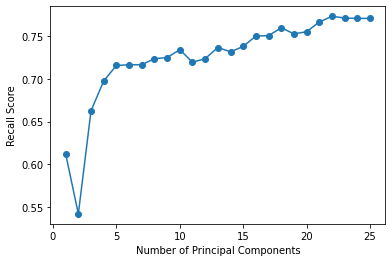

In [ ]:
#Plot recall scores against number of features used
plt.plot(range(1,components), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Principal Components')
plt.show()

Based on the plot above, it appears that model performance increases as more principal components are used, until 22 components are reached. After that,Recall performance plateaus.

## 4.2 Top 22 Principal Components, Filter Method - Evaluation using Repeated 10-fold Cross Validation
Based on the results above, it was decided to build a XGBoost model using the top 22 principal components.

In [ ]:
#Only select top 22 components for X
X = df.iloc[:,:22]
y = df['Worse_MH']

In [ ]:
#Set cross-validation to 10-folds, repeated 3 times
folds = 10
repeats = 3
rkf = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats)

#XGBoost classification model, using the parameters identified during hyperparameter tuning
model = XGBClassifier(colsample_bytree=0.8, gamma=0.05, learning_rate=0.01, max_depth=40, min_child_weight=1, n_estimators=800, reg_alpha=0.05, subsample=0.7)

#Performance metrics
accuracy = precision = recall = f1 = auc = brier = ex_time = 0

for train_index, test_index in rkf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #Apply Synthetic Mifilnority Oversampling Technique (SMOTE) to training set to correct class imbalance
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)

  t1 = time.perf_counter() #time counter start

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  t2 = time.perf_counter() #time counter ends

  accuracy = accuracy + metrics.accuracy_score(y_test, y_pred)
  precision = precision + metrics.precision_score(y_test, y_pred)
  recall = recall + metrics.recall_score(y_test, y_pred)
  f1 = f1 + metrics.f1_score(y_test, y_pred)
  auc = auc + metrics.roc_auc_score(y_test, y_pred)
  brier = brier + metrics.brier_score_loss(y_test, y_pred)
  ex_time = ex_time + t2-t1

#Save results into dictionary
xgb_22_tuned_pca = {'Accuracy':accuracy/(folds*repeats), 'Precision':precision/(folds*repeats),'Recall':recall/(folds*repeats),\
          'F1-Score':f1/(folds*repeats),'AUC':auc/(folds*repeats),'Brier Score':brier/(folds*repeats),'Execution Time (sec)':ex_time/(folds*repeats)}

#Evaluation of XGBoost classification model
print("Accuracy:", accuracy/(folds*repeats))
print("Precision:", precision/(folds*repeats))
print("Recall:", recall/(folds*repeats))
print("F1-score:", f1/(folds*repeats))
print("Area Under Curve (AUC):", auc/(folds*repeats))
print("Brier Score:", brier/(folds*repeats))
print('Execution time in seconds:', ex_time/(folds*repeats))

Accuracy: 0.6644148456195917
Precision: 0.7553692116900464
Recall: 0.7584322745845923
F1-score: 0.756849629289127
Area Under Curve (AUC): 0.607385586890317
Brier Score: 0.33558515438040815
Execution time in seconds: 194.9798847585332


The model performed better than the base model in section 1, and less than 1% worse for all metrics compared to the tuned model using all principal components (section 4.1).

# 5. Comparison of Models

In [ ]:
#Combine performance metrics for all models into one dataframe
comparison = pd.DataFrame([xgb_all_base_pca, xgb_all_tuned_pca, xgb_22_tuned_pca], index=['XGBoost All Components - Base (PCA)','XGBoost All Components - Tuned (PCA)','XGBoost 22 Components - Tuned (PCA)'])
comparison

,Accuracy,Precision,Recall,F1-Score,AUC,Brier Score,Execution Time (sec)
XGBoost All Components - Base (PCA),0.639145,0.792784,0.644593,0.711049,0.635840,0.360855,3.000000
XGBoost All Components - Tuned (PCA),0.668245,0.755334,0.766759,0.760951,0.608488,0.331755,217.451204
XGBoost 22 Components - Tuned (PCA),0.664415,0.755369,0.758432,0.756850,0.607386,0.335585,194.979885


'XGBoost All Components - Tuned (PCA)', the XGBoost model using all features and the parameters identified during hyperparameter tuning, had the best Accuracy, Recall, F1-Score, and Brier Score. However, it's performance was within 1% for all metrics compared to the 'XGBoost 22 Components - Tuned (PCA)'. Since the best model had a reasonable execution time of 217 seconds, it was selected as the best model to use.

# 6. Stability of Best Model by Varying k-folds for Cross Validation

The stability of the best model identified above was tested by performing repeated k-folds cross-validation, with values of k from 5 to 12, and 2 repeats.
*   Originally, values of k from 3 to 15 were used, and the number of repeats was set to 3, but execution runtime exceeded 5 hours before the decision was made to interrupt execution. Thus, values of k and the number of repeats were then changed to reduce runtime.

In [ ]:
X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

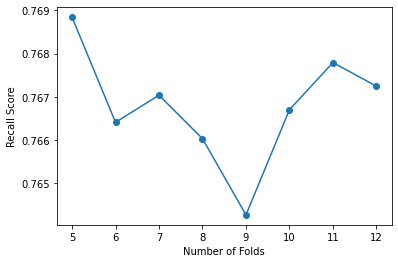

Range of Recall Scores: 0.4568569752266938


In [ ]:
recall_test = []

for k in range(5, 13):
  #Set cross-validation to k-folds, repeated 2 times.
  repeats = 2
  rkf = RepeatedStratifiedKFold(n_splits=k, n_repeats=repeats)

  #Best XGBoost classification model identified in section 5, 'XGBoost All Components - Tuned (PCA)'
  model = XGBClassifier(colsample_bytree=0.8, gamma=0.05, learning_rate=0.01, max_depth=40, min_child_weight=1, n_estimators=800, reg_alpha=0.05, subsample=0.7)

  #Performance metrics
  recall = 0

  for train_index, test_index in rkf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    recall = recall + metrics.recall_score(y_test, y_pred)

  #Calculate average recall, append to list
  recall_test.append(recall/(k*repeats))

#Plot recall scores against number of folds used
plt.plot(range(5, 13), recall_test, marker='o')
plt.ylabel('Recall Score')
plt.xlabel('Number of Folds')
plt.show()

print("Range of Recall Scores:", (max(recall_test)-min(recall_test))*100)

The model appears to be quite stable, with Recall ranging by less than 1%.